In [150]:
import csv
from time import sleep
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options


## Craw Data 


Đào dữ liệu từ website: batdongsan.com.vn


In [151]:
# # Constants
# urllink = 'https://batdongsan.com.vn'
# amp = 'https://batdongsan.com.vn/ban-can-ho-chung-cu-tp-hcm/p'
# amp1 = '?cIds=650,362,41,325,163,575,361,40,283'
# n = 3200
# namefile = 'bds_raw_data_new.csv'

# # Set up Selenium WebDriver
# user_agent = UserAgent().random
# chrome_options = Options()
# chrome_options.add_argument('--no-sandbox')
# chrome_options.add_argument('--disable-gpu') 
# chrome_options.add_argument('--disable-dev-shm-usage')
# chrome_options.add_argument(f'user-agent={user_agent}')
# chrome_driver_path = '/Users/mac/Downloads/chromedriver'
# service = Service(chrome_driver_path)

# with open(namefile, 'w', newline='', encoding='utf-8') as csvfile:
#     fieldnames = ['Địa chỉ', 'Mức giá', 'Diện tích', 'Số phòng ngủ', 'Số tầng', 'Số toilet', 'Mô tả', 'Link', "Pháp lý", "Đường vào", "Mặt tiền", "Hướng nhà", "Nội thất"]
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()

#     start_page = 1
#     for i in range(start_page, n):
#         url = amp + str(i) + amp1

#         driver = webdriver.Chrome(service=service, options=chrome_options)
#         driver.get(url)
#         sleep(0.5)  # Adjusted sleep time for better loading
#         soup = BeautifulSoup(driver.page_source, 'html.parser')

#         for div in soup.findAll('a', class_='js__product-link-for-product-id'):
#             link = div.get('href')
#             full_link = urllink + link

#             drive = webdriver.Chrome(service=service, options=chrome_options)
#             drive.get(full_link)
#             sleep(0.2)  # Increased sleep for property page loading
#             soup = BeautifulSoup(drive.page_source, 'html.parser')

#             data = {}
#             data['Địa chỉ'] = soup.find('span', class_='re__pr-short-description js__pr-address').get_text().strip()

#             container = soup.find('div', class_='re__pr-specs-content js__other-info')
#             for title in ["Diện tích", "Mức giá", "Số phòng ngủ", "Số tầng", "Số toilet", "Pháp lý", "Đường vào", "Mặt tiền", "Hướng nhà", "Nội thất"]:  
#                 item = container.find('span', class_='re__pr-specs-content-item-title', text=title)
#                 if item:
#                     value = item.find_next_sibling('span', class_='re__pr-specs-content-item-value').text.strip()
#                     data[title] = value
#                 else:
#                     data[title] = "Not found"
            
#             data['Mô tả'] = soup.find('div', class_='re__section-body re__detail-content js__section-body js__pr-description js__tracking').get_text().strip()
#             data['Link'] = full_link 

#             print(data)
#             writer.writerow(data)

#             print("Successfully processed data from batdongsan.com.vn")
#             drive.quit()
#         driver.quit()
# print("END")


## Clean Data

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from unidecode import unidecode
import re
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [153]:
df = pd.read_csv('/Users/mac/crawdata/bds_raw_data.csv')
print(df.shape)
df.head()

(62016, 13)


,Địa chỉ,Mức giá,Diện tích,Số phòng ngủ,Số tầng,Số toilet,Mô tả,Link,Pháp lý,Đường vào,Mặt tiền,Hướng nhà,Nội thất
0,"Đường Lê Văn Sỹ, Phường 13, Quận 3, Hồ Chí Minh",69 tỷ,210 m²,Not found,5 tầng,Not found,"- Bán tòa nhà đẹp nhất Mặt tiền Lê Văn Sỹ, Phường 13, Quận 3.- Diện tích: 9 x 23m.- Kết cấu: 5 tầng.- Vị trí tuyệt đẹp, có hẻm thoáng bên hông, quy hoạch hiện hữu rất đẹp. Vỉa hè rộng rãi.- Hợp đồng thuê: 260 triệu/tháng, ngân hàng Eximbank.- Giá: 69 tỷ TL.",https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/ Sổ hồng,Not found,Not found,Not found,Đầy đủ
1,"Đường Lê Đức Thọ, Phường 16, Gò Vấp, Hồ Chí Minh","20,5 tỷ",237 m²,11 phòng,5 tầng,11 phòng,"Bán nhà góc 2 mặt tiền đường Lê Đức Thọ, Phường 16, Quận Gò Vấp.- Diện tích: 12m x 25m, DTCN 237m².- Kết cấu: Trệt 4 Lầu xây dựng kiên cố, thiết kế hiện đại và đẳng cấp. Công năng gồm 11 phòng ngủ, 11 WC, nội thất cao cấp.- Tiện ích xung quanh đủ đầy: Cách nhà thiếu nhi Quận Gò Vấp 100m, gần Cityland 2 phút đi xe máy, bán kính 200m là Lotte mart Gò Vấp, chợ Xóm Mới, An Nhơn, gần các trường ĐH Công Nghiệp, ĐH Gia Đinh, Văn Lang,...- Tiềm năng phát triển: Khu vực đang phát triển mạnh mẽ, giá trị bất động sản tăng trưởng không ngừng, tiềm năng tăng giá cao.- Cơ hội đầu tư: Nhà nằm vị trí đắc địa sầm uất nhất Quận Gò Vấp, nhà tiện ở, mở văn phòng công ty, mở phòng khám, trung tâm anh ngữ hoặc cho thuê với thu nhập lên đến 60 triệu/tháng.- Pháp lý an toàn: Sổ chính chủ, hoàn công đầy đủ, bao sang tên.Giá bán: 20.5 tỷ TL.Liên hệ: Hồng Nhung - hỗ trợ xem nhà!",https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-duc-tho-phuong-16-3/ban-goc-2-tien-16-go-vap-cn-237m2-5-tang-kien-co-22-ty-bot-loc-pr40564480,Sổ đỏ/ Sổ hồng,Not found,Not found,Not found,Đầy đủ.
2,"Đường Trần Hưng Đạo, Phường Cô Giang, Quận 1, Hồ Chí Minh",22 tỷ,72 m²,8 phòng,4 tầng,Not found,"Xuất cảnh đi nước ngoài cần bán nhà trong tháng ngay mặt tiền Trần Đình Xu - Trần Hưng Đạo, Phường Cô Giang Quận 1.Diện tích: 4mx18m.Kết cấu: Trệt, 3 lầu.Pháp lý sổ hồng đầy đủ.Giá bán: 22 tỷ.Liên hệ cần xem nhà xem sổ qua số: 0932 613 ***",https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/ Sổ hồng,Not found,Not found,Not found,Not found
3,"Đường 30/4, Phường Tân Thành, Tân Phú, Hồ Chí Minh",25 tỷ,213 m²,1 phòng,1 tầng,1 phòng,Bán nhà MT nội bộ P Tân Thành Q Tân Phú.DT: 10 x 22m.HT: Nhà C4.Mặt tiền đường 12m ngay ngã 4 Vườn Lài - Luỹ Bán Bích - Tân Thành.Pháp lý: Sổ hồng.Giá bán: 25 tỷ.LH coi nhà: 0943 565 *** Đức Quang.,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/ Sổ hồng,12 m,10 m,Đông - Nam,Không nội thất.
4,"Cityland Garden Hills, 366, Đường Phan Văn Trị, Phường 5, Gò Vấp, Hồ Chí Minh",40 tỷ,160 m²,Not found,5 tầng,Not found,Bán nhà biệt thự Cityland - 366 Phan Văn Trị - Phường 5 - Quận Gò Vấp.- Nhà chủ mua đất KTS thiết kế tự xây dựng.- Mới đẹp. - nội thất cao cấp.- Ngay Mặt tiền Phan Văn Trị.- Trường học - siêu thị - y tế đầy đủ xung quanh.- Liên hệ 0377 411 *** Quang Linh.,https://batdongsan.com.vn/ban-nha-mat-pho-duong-phan-van-tri-phuong-5-15-prj-cityland-garden-hills-go-vap/ban-biet-thu-8x20m-2-tien-ham-4-tang-full-noi-that-gia-40-ty-pr40094139,Sổ đỏ/ Sổ hồng.,Not found,8 m,Not found,Đầy đủ


In [154]:
df.drop('Đường vào',axis=1,inplace=True)
df.drop('Mặt tiền',axis=1,inplace=True)

In [155]:
df.columns = ['District','Price','Land Area','Bedroom','Floor','Bathroom','Category','Link','Verification','Direction','Furniture']
df.head()

,District,Price,Land Area,Bedroom,Floor,Bathroom,Category,Link,Verification,Direction,Furniture
0,"Đường Lê Văn Sỹ, Phường 13, Quận 3, Hồ Chí Minh",69 tỷ,210 m²,Not found,5 tầng,Not found,"- Bán tòa nhà đẹp nhất Mặt tiền Lê Văn Sỹ, Phường 13, Quận 3.- Diện tích: 9 x 23m.- Kết cấu: 5 tầng.- Vị trí tuyệt đẹp, có hẻm thoáng bên hông, quy hoạch hiện hữu rất đẹp. Vỉa hè rộng rãi.- Hợp đồng thuê: 260 triệu/tháng, ngân hàng Eximbank.- Giá: 69 tỷ TL.",https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/ Sổ hồng,Not found,Đầy đủ
1,"Đường Lê Đức Thọ, Phường 16, Gò Vấp, Hồ Chí Minh","20,5 tỷ",237 m²,11 phòng,5 tầng,11 phòng,"Bán nhà góc 2 mặt tiền đường Lê Đức Thọ, Phường 16, Quận Gò Vấp.- Diện tích: 12m x 25m, DTCN 237m².- Kết cấu: Trệt 4 Lầu xây dựng kiên cố, thiết kế hiện đại và đẳng cấp. Công năng gồm 11 phòng ngủ, 11 WC, nội thất cao cấp.- Tiện ích xung quanh đủ đầy: Cách nhà thiếu nhi Quận Gò Vấp 100m, gần Cityland 2 phút đi xe máy, bán kính 200m là Lotte mart Gò Vấp, chợ Xóm Mới, An Nhơn, gần các trường ĐH Công Nghiệp, ĐH Gia Đinh, Văn Lang,...- Tiềm năng phát triển: Khu vực đang phát triển mạnh mẽ, giá trị bất động sản tăng trưởng không ngừng, tiềm năng tăng giá cao.- Cơ hội đầu tư: Nhà nằm vị trí đắc địa sầm uất nhất Quận Gò Vấp, nhà tiện ở, mở văn phòng công ty, mở phòng khám, trung tâm anh ngữ hoặc cho thuê với thu nhập lên đến 60 triệu/tháng.- Pháp lý an toàn: Sổ chính chủ, hoàn công đầy đủ, bao sang tên.Giá bán: 20.5 tỷ TL.Liên hệ: Hồng Nhung - hỗ trợ xem nhà!",https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-duc-tho-phuong-16-3/ban-goc-2-tien-16-go-vap-cn-237m2-5-tang-kien-co-22-ty-bot-loc-pr40564480,Sổ đỏ/ Sổ hồng,Not found,Đầy đủ.
2,"Đường Trần Hưng Đạo, Phường Cô Giang, Quận 1, Hồ Chí Minh",22 tỷ,72 m²,8 phòng,4 tầng,Not found,"Xuất cảnh đi nước ngoài cần bán nhà trong tháng ngay mặt tiền Trần Đình Xu - Trần Hưng Đạo, Phường Cô Giang Quận 1.Diện tích: 4mx18m.Kết cấu: Trệt, 3 lầu.Pháp lý sổ hồng đầy đủ.Giá bán: 22 tỷ.Liên hệ cần xem nhà xem sổ qua số: 0932 613 ***",https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/ Sổ hồng,Not found,Not found
3,"Đường 30/4, Phường Tân Thành, Tân Phú, Hồ Chí Minh",25 tỷ,213 m²,1 phòng,1 tầng,1 phòng,Bán nhà MT nội bộ P Tân Thành Q Tân Phú.DT: 10 x 22m.HT: Nhà C4.Mặt tiền đường 12m ngay ngã 4 Vườn Lài - Luỹ Bán Bích - Tân Thành.Pháp lý: Sổ hồng.Giá bán: 25 tỷ.LH coi nhà: 0943 565 *** Đức Quang.,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/ Sổ hồng,Đông - Nam,Không nội thất.
4,"Cityland Garden Hills, 366, Đường Phan Văn Trị, Phường 5, Gò Vấp, Hồ Chí Minh",40 tỷ,160 m²,Not found,5 tầng,Not found,Bán nhà biệt thự Cityland - 366 Phan Văn Trị - Phường 5 - Quận Gò Vấp.- Nhà chủ mua đất KTS thiết kế tự xây dựng.- Mới đẹp. - nội thất cao cấp.- Ngay Mặt tiền Phan Văn Trị.- Trường học - siêu thị - y tế đầy đủ xung quanh.- Liên hệ 0377 411 *** Quang Linh.,https://batdongsan.com.vn/ban-nha-mat-pho-duong-phan-van-tri-phuong-5-15-prj-cityland-garden-hills-go-vap/ban-biet-thu-8x20m-2-tien-ham-4-tang-full-noi-that-gia-40-ty-pr40094139,Sổ đỏ/ Sổ hồng.,Not found,Đầy đủ


In [156]:
#Drop duplicated values
df.drop_duplicates(inplace=True)
df.shape

(24560, 11)

In [157]:
#Delete zero price
df['Price'] = df['Price'].fillna('0')
zero_price = df[df['Price'].str.contains('0')].index
not_found = df[df['Price'].str.contains('Not found')].index
thoa_thuan = df[df['Price'].str.contains('Thỏa thuận')].index
df.drop(thoa_thuan,inplace=True)
df.drop(zero_price,inplace=True)
df.drop(not_found,inplace=True)
df.shape

(19898, 11)

In [158]:
def convert_price(price):
    if 'triệu' in price:
        value = float(price.split(' ')[0].replace(',', '.'))/1000
    elif 'tỷ' in price:
        value = float(price.split(' ')[0].replace(',', '.'))
    else:
        value = price
    return str(value)

def remove_wrong_number_format(df, column):
    df[column] = df[column].apply(lambda x: '--' if len(x.split('.')) > 2 else x)
    return f'Removed wrong number format of column {column}'

df.replace("Not found", "--", inplace=True)
df['Price'] = df['Price'].apply(convert_price)
df['Land Area'] = df['Land Area'].apply(lambda x: x.split(' ')[0].replace('.', '').replace(',', '.'))
df['Bathroom'] = df['Bathroom'].apply(lambda x: x.split(' ')[0].replace('.', '').replace(',', '.'))
df['Bedroom'] = df['Bedroom'].apply(lambda x: x.split(' ')[0].replace('.', '').replace(',', '.'))
df['Floor'] = df['Floor'].apply(lambda x: x.split(' ')[0].replace('.', '').replace(',', '.'))
for num_col in ['Price', 'Land Area']:
    print(remove_wrong_number_format(df, num_col))

Removed wrong number format of column Price
Removed wrong number format of column Land Area


In [159]:
keywords = ['Cơ bản','nội thất','Đầy đủ','Nội thất']
pattern = re.compile('|'.join(keywords))

furniture = []
for i in df['Furniture']:
    if isinstance(i, str) and pattern.search(i):
        furniture.append(1)
    else:
        furniture.append(0)

df['Furniture'] = furniture

In [160]:
#Exact information of house Category
mezzanine = []
for i in df['Category']:
    if ('lửng' in i) or ('gác suốt' in i):
        mezzanine.append(1)
    elif '--' in i:
        mezzanine.append(np.nan)
    else:
        mezzanine.append(0)

rooftop = []
for i in df['Category']:
    if ('tầng hầm' in i) or ('hầm'in i):
        rooftop.append(1)
    elif '--' in i:
        rooftop.append(np.nan)
    else:
        rooftop.append(0)

basement = []
for i in df['Category']:
    if ('tầng thượng' in i) or ('sân thượng'in i):
        basement.append(1)
    elif '--' in i:
        basement.append(np.nan)
    else:
        basement.append(0)

In [161]:
#Create new features
df['Have Mezzanine'] = mezzanine
df['Have Rooftop'] = rooftop
df['Have Basement'] = basement

In [162]:
# Đặt giá trị mặc định cho 'Is Land'
df['Is Land'] = 0

# Xác định các bất động sản là đất
df.loc[(df['Bedroom'] == '--') & (df['Bathroom'] == '--') & (df['Floor'] == '--') 
       & (df['Link'].str.lower().str.contains('ban-dat-')), 'Is Land'] = 1

# Loại bỏ các quan sát bị nhầm lẫn
confused_obs = df.loc[(df['Bedroom'] == '--') & (df['Bathroom'] == '--') & (df['Floor'] != '--') 
                      & (df['Link'].str.lower().str.contains('ban-dat-'))].index
df.drop(confused_obs, inplace=True)


In [163]:
#Extract other information
other_info = df['Category'].fillna('None')

near_market = []
for i in other_info:
    if ('chợ' in i) or ('siêu thị' in i) or ('trung tâm thương mại' in i) :
        near_market.append(1)
    elif 'None' in i:
        near_market.append(np.nan)
    else:
        near_market.append(0)

near_school = []
for i in other_info:
    if ('trường học' in i) or ('đại học' in i) or ('tiểu học' in i) or ('Gần trường' in i) or ('THPT' in i) or ('trường ĐH' in i) or ('THCS' in i):
        near_school.append(1)
    elif 'None' in i:
        near_school.append(np.nan)
    else:
        near_school.append(0)

near_hospital = []
for i in other_info:
    if 'bệnh viện' in i:
        near_hospital.append(1)
    elif 'None' in i:
        near_hospital.append(np.nan)
    else:
        near_hospital.append(0)

securities_space = []
for i in other_info:
    if 'an ninh' in i:
        securities_space.append(1)
    elif 'None' in i:
        securities_space.append(np.nan)
    else:
        securities_space.append(0)

car_park = []
for i in other_info:
    if 'để xe rộng rãi' in i:
        car_park.append(1)
    elif 'None' in i:
        car_park.append(np.nan)
    else:
        car_park.append(0)

urgent_sale = []
for i in other_info:
    if 'bán gấp' in i:
        urgent_sale.append(1)
    elif 'None' in i:
        urgent_sale.append(np.nan)
    else:
        urgent_sale.append(0)

frontage = []
for i in df['Link']:
    if 'nha-mat-pho' in i:
        frontage.append(1)
    else:
        frontage.append(0)


#Create new features
df['Near Market'] = near_market
df['Near School'] = near_school
df['Near Hospital'] = near_hospital
df['Frontage'] = frontage
df['Securities Space'] = securities_space
df['Have Car Park'] = car_park
df['Urgent Sale'] = urgent_sale
 
df.drop('Category',axis=1,inplace=True)

In [164]:
def extract_district(district_string):
    # Extract the part before "Hồ Chí Minh"
    match = re.search(r's*(.*),(.*?),\s*Hồ Chí Minh', district_string)
    if match:
        return match.group(1).strip()
    return district_string

df['Adress'] = df['District'].apply(extract_district)

In [165]:
df.insert(df.columns.get_loc('District') + 1, 'Adress', df.pop('Adress'))
df.head() 

,District,Adress,Price,Land Area,Bedroom,Floor,Bathroom,Link,Verification,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale
0,"Đường Lê Văn Sỹ, Phường 13, Quận 3, Hồ Chí Minh","Đường Lê Văn Sỹ, Phường 13",69.0,210,--,5,--,https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/ Sổ hồng,--,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
2,"Đường Trần Hưng Đạo, Phường Cô Giang, Quận 1, Hồ Chí Minh","Đường Trần Hưng Đạo, Phường Cô Giang",22.0,72,8,4,--,https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/ Sổ hồng,--,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,"Đường 30/4, Phường Tân Thành, Tân Phú, Hồ Chí Minh","Đường 30/4, Phường Tân Thành",25.0,213,1,1,1,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/ Sổ hồng,Đông - Nam,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
6,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ, Quận 9, Hồ Chí Minh","Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ",15.5,108,4,5,4,https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Đông - Bắc,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0
7,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè, Nhà Bè, Hồ Chí Minh","Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè",6.2,50,4,3,5,https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/ Sổ hồng,--,1,0.0,0.0,1.0,0,0,0,0,0,0,0,0


In [166]:
# Normalize the 'District' column
df['District'] = [unidecode(i).lower().strip() for i in df['District']]

# Function to extract category and district
def extract_category_and_district(district_string):
    match = re.search(r'.*\s(quan\s\d+|tan phu|nha be|binh thanh|go vap|binh tan|tan phu|phu nhuan|thu duc|hoc mon|binh chanh|cu chi|tan binh|can gio)', district_string)
    if match:
        return match.group(1).strip()  # Return the district part
    return ""

# Apply the extraction function
df['District'] = df['District'].apply(extract_category_and_district)

# Display the updated DataFrame
print(df[['District']].head())

df.head()

  District
0   quan 3
2   quan 1
3  tan phu
6   quan 9
7   nha be


,District,Adress,Price,Land Area,Bedroom,Floor,Bathroom,Link,Verification,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale
0,quan 3,"Đường Lê Văn Sỹ, Phường 13",69.0,210,--,5,--,https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/ Sổ hồng,--,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
2,quan 1,"Đường Trần Hưng Đạo, Phường Cô Giang",22.0,72,8,4,--,https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/ Sổ hồng,--,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,tan phu,"Đường 30/4, Phường Tân Thành",25.0,213,1,1,1,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/ Sổ hồng,Đông - Nam,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
6,quan 9,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ",15.5,108,4,5,4,https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Đông - Bắc,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0
7,nha be,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè",6.2,50,4,3,5,https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/ Sổ hồng,--,1,0.0,0.0,1.0,0,0,0,0,0,0,0,0


In [167]:
df = df[df['District'] != ""]
df_grouped = df.groupby('District')['District'].agg("count")
df.groupby("District")["District"].agg("count")

District
binh chanh     299
binh tan       785
binh thanh    2165
can gio         26
cu chi         203
go vap        1089
hoc mon        166
nha be         360
phu nhuan      744
quan 1        2022
quan 10        716
quan 11        153
quan 12       1894
quan 2        1510
quan 3         564
quan 4         206
quan 5         180
quan 6         275
quan 7        1615
quan 8         370
quan 9        1336
tan binh      1046
tan phu        961
thu duc       1182
Name: District, dtype: int64

In [168]:
df = df.replace('hoc mon', 'quan 12')
df = df.replace('quan 2', 'thu duc')
df = df.replace('quan 9', 'thu duc')
df = df.replace('can gio', 'Other')
df = df.replace('cu chi', 'Other')

df.groupby("District")["District"].agg("count")

District
Other          229
binh chanh     299
binh tan       785
binh thanh    2165
go vap        1089
nha be         360
phu nhuan      744
quan 1        2022
quan 10        716
quan 11        153
quan 12       2060
quan 3         564
quan 4         206
quan 5         180
quan 6         275
quan 7        1615
quan 8         370
tan binh      1046
tan phu        961
thu duc       4028
Name: District, dtype: int64

In [169]:

def replace_value(value):
    if isinstance(value, str) and ('sổ đỏ' in value.lower() or 'sổ hồng' in value.lower()):
        return 'Sổ đỏ/Sổ hồng'
    return value

df['legal_status'] = df['Verification'].apply(replace_value)

chunk1 = [
    "Sổ đỏ/Sổ hồng",
    "Đã có sổ",
    "Sổ đỏ/ Sổ hồng",
    "Có sổ.",
    "SHR",
    "Có sổ",
    "Sổ hồng",
    "Sổ riêng hoàn công",
    "Có sổ đó",
    "+ Sổ vuông vức, pháp lý chuẩn, hoàng công đầy đủ.",
    "Đã có sổ.",
    "Pháp lý hoàn chỉnh.",
    "Đầy đủ",
    "Sổ",
    "Pháp lý chuẩn.",
    "Sổ riêng hoàn công đủ",
    "Sổ sẳn",
    "Pháp lý chuẩn",
    "Sổ pháp lý đầy đủ",
    "Chuẩn",
    "Đã có sổ và hoàn công đầy đủ, bao pháp lý",
    "- SHR, pháp lý chuẩn, công chứng ngay.",
    "SHCC",
    "Đã có chủ quyền Hồng hợp lệ",
    "Đã có hồng.",
    "Sổ riêng",
    "Sổ riêng sẵn, pháp lý chuẩn.",
    "Sổ riêng.",
    "Nhà chính chủ 60 năm",
    "Chủ quyền hồng",
    "Sổ hồnh",
    "Sổ vuông vức, 1 chủ mua đất xây dựng, hoàn công đủ, công chứng ngay.",
    "Số hồng đầy đủ rõ ràng",
    "Sổ vuông",
    "Sổ chung, công chứng vi bằng.",
    "Sổ Pháp lý rõ ràng",
    "Pháp lý rõ ràng",
    "Có sổ riêng",
    "Đã bàn giao nhà",
    "Sổ đỏ/ sổ hồng",
    "- Sổ riêng chính chủ, công chứng bất cứ lúc nào.",
    "Bộ hồ sơ giấy tờ nhà riêng",
    "Sổ chính chủ",
    "- Sổ vuông vức, chính chủ, không lỗi, công chứng ngay.",
    "Có.",
    "Pháp lý sạch, sẵn sàn giao dịch ngay.",
    "- Sổ sách đầy đủ, pháp lý rõ ràng, thủ tục nhanh chóng.",
    "SH"
    
]

chunk2 = [
    "Hợp đồng mua bán",
    "Hợp đồng mua bán.",
    "HĐMB",
    "HDMB",
    "Hợp đồng mua bán sang tên Phú Mỹ Hưng",
    "HĐMB hỗ trợ 70%",
    "Hợp Đồng Mua Bán",
    "HDMB."
]

chunk3 = [
    "Đang chờ sổ",
    "Đang chờ sổ.",
    "Chờ sổ"

]

chunk4 = [
    "Sổ đỏ/Sổ hồng",
    "Công chứng ngay",
    "Công chứng giao nhà ngay",
    "Công chứng ngay.",
    "Đã có sổ. Sang tên công chứng ngay",
    "Đã có sổ. Công chứng mua bán ngay",
    "Giấy tờ chính chủ công chứng ngay",
    "Sô vuông , hoàn công đủ công chứng ngay trong ngày",
    "Pháp lý sạch, công chứng trong ngày.",
    "Vĩnh viễn.",
    "+ Pháp lý chính chủ.",
    "Vi Bằng",
    "Vì Bằng",
    "Pháp lý đầy đủ.",
    "Vi bằng",
    "Pháp lý đầy đủ.",
    "Sổ vuông đẹp tại gia hoàn công đủ",
    "--",
    "Pháp lý: Sẵn sàng giao dịch.",
    "Đồng sở hữu mã thửa đất 3 căn",
    "Sổ sách đầy đủ, pháp lý rõ ràng, thủ tục nhanh chóng.",
    "Sổ vuông đẹp tại gia hoàn công đủ",
    "- Pháp lí hoàn công đầy đủ.",
    "Đã có chủ quyền Hồng hợp lệ",
    "Sổ vuông vức",
    "Công chứng vi bằng.",
    "Sổ chung",
    "- Pháp lý rõ ràng, minh bạch, sẵn sàng hỗ trợ giao dịch một cách nhanh chóng.",
    "Bộ thuế đủ mua bán công chứng vi bằng",
    "Hiệp thành 2",
    "Sổ sẵn",
    "Sổ đầy đủ",
    "+ Pháp lý chuẩn, sổ vuông vức, hoàn công đầy đủ, mua công chứng ngay ko phải chờ.",
    "+ Pháp lí rõ ràng Sổ sẵn công chứng ngay.",
    "- Sổ đẹp vuông vức - hoàn công đầy đủ.",
    "Đã được phê duyệt quyết định đầu tư.",
    "Giấy phép xây dựng đầy đủ",
    "Sẵn sổ công chứng ngay",
    "- Pháp lý: Sổ cá nhân.",
    "Đã hoàn công",
    "Sổ vuông cực đẹp",
    "Bán nhà trung tâm Quận 3 - siêu phẩm - hẻm 10m một trục - xe hơi ngủ trong nhà - cực Vip hiếm nhà bán - 78m² - 4 tầng BTCT - nhỉnh 14 tỷ. + Nội thất cao cấp, hẻm thông Trường Sa, Trần Quốc Thảo, Trương Định... Gần Võ Thị Sáu, Bà Huyện Thanh Quan.... + H"
    
]

chunk5 = [
    "Hợp đồng đặt cọc",
    "Hợp đồng đặt cọc.",
    "Hợp Đồng Đặt Cọc",
    "Hợp đồng thuê dài hạn",
    "1/500",
    "Đã bàn giao",
    "Sắp bàn giao.",
    "433-435 ĐBP",
    "Sổ riêng đang gửi bank",
    "Số 77",
    "St,",
    "383",
    "4"
]

def standardize_legal_status(value):
    if value in chunk1:
        return "Sổ đỏ/Sổ hồng"
    elif value in chunk2:
        return "Hợp đồng mua bán"
    elif value in chunk3:
        return "Đang chờ sổ"
    elif value in chunk4:
        return "Sổ đỏ/Sổ hồng"
    elif value in chunk5:
        return "Hợp đồng đặt cọc"
    return value

# Exclude entries in chunk5
df = df[~df['Verification'].isin(chunk5)].copy()

# Apply the standardization function
df['legal_status'] = df['legal_status'].apply(standardize_legal_status)

print(df['legal_status'])

df.insert(df.columns.get_loc('Verification') + 1, 'legal_status', df.pop('legal_status'))
df.drop('Verification',axis=1,inplace=True)


0           Sổ đỏ/Sổ hồng
2           Sổ đỏ/Sổ hồng
3           Sổ đỏ/Sổ hồng
6        Hợp đồng mua bán
7           Sổ đỏ/Sổ hồng
               ...       
61963       Sổ đỏ/Sổ hồng
61964       Sổ đỏ/Sổ hồng
61965       Sổ đỏ/Sổ hồng
61967       Sổ đỏ/Sổ hồng
61968       Sổ đỏ/Sổ hồng
Name: legal_status, Length: 19852, dtype: object


In [170]:
df['legal_status'].unique()

array(['Sổ đỏ/Sổ hồng', 'Hợp đồng mua bán', 'Đang chờ sổ', nan],
      dtype=object)

In [171]:
df['Direction'].fillna("--", inplace=True)
df['Direction'].unique()

array(['--', 'Đông - Nam', 'Đông - Bắc', 'Đông', 'Tây - Bắc', 'Tây - Nam',
       'Tây', 'Nam', 'Bắc'], dtype=object)

In [172]:
df['Direction'].replace(['Đông - Nam','Tây - Nam','Nam','Tây - Bắc','Đông - Bắc','Bắc','Đông','Tây','--'],\
    ['Nam','Nam','Nam','Bắc','Bắc','Bắc','Đông','Tây','Không xác định'],inplace=True)


In [173]:
#Correct missing values
for col in df.columns:
    df[col] = df[col].replace(['--'],[np.nan])

df.head()

,District,Adress,Price,Land Area,Bedroom,Floor,Bathroom,Link,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale
0,quan 3,"Đường Lê Văn Sỹ, Phường 13",69.0,210,NaN,5,NaN,https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/Sổ hồng,Không xác định,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
2,quan 1,"Đường Trần Hưng Đạo, Phường Cô Giang",22.0,72,8,4,NaN,https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/Sổ hồng,Không xác định,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,tan phu,"Đường 30/4, Phường Tân Thành",25.0,213,1,1,1,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/Sổ hồng,Nam,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
6,thu duc,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ",15.5,108,4,5,4,https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Bắc,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0
7,nha be,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè",6.2,50,4,3,5,https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/Sổ hồng,Không xác định,1,0.0,0.0,1.0,0,0,0,0,0,0,0,0


In [174]:
#Correct dtype of columns
for num_col in df.drop(['District','Adress','Link','legal_status','Direction'],axis=1):
    df[num_col] = df[num_col].astype('float')

df.head()

,District,Adress,Price,Land Area,Bedroom,Floor,Bathroom,Link,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale
0,quan 3,"Đường Lê Văn Sỹ, Phường 13",69.0,210.0,NaN,5.0,NaN,https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/Sổ hồng,Không xác định,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,quan 1,"Đường Trần Hưng Đạo, Phường Cô Giang",22.0,72.0,8.0,4.0,NaN,https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/Sổ hồng,Không xác định,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tan phu,"Đường 30/4, Phường Tân Thành",25.0,213.0,1.0,1.0,1.0,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/Sổ hồng,Nam,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,thu duc,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ",15.5,108.0,4.0,5.0,4.0,https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Bắc,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,nha be,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè",6.2,50.0,4.0,3.0,5.0,https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/Sổ hồng,Không xác định,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
df['Price/m2'] = df['Price'] / df['Land Area']

In [176]:
#Check if features that having too many missing values
for feature in df.columns:
        pct_missing = np.round(df[feature].isnull().mean()*100,4)
        if pct_missing >= 70:
            print(f'{feature}: {pct_missing} % missing values')

In [177]:
#Handle binary features which are missing values
binary_features_nan = [feature for feature in df.columns\
    if len(df[feature].dropna().unique())==2]
binary_features_nan

['Furniture',
 'Have Mezzanine',
 'Have Rooftop',
 'Have Basement',
 'Is Land',
 'Near Market',
 'Near School',
 'Near Hospital',
 'Frontage',
 'Securities Space',
 'Have Car Park',
 'Urgent Sale']

In [178]:
#Because these features are extra information from the buyer, the missing values here mean there is no extra information
#So we call fill them with zero values
df[binary_features_nan] = df[binary_features_nan].fillna(0)

In [179]:
def fill_missing_values(df):
    df.loc[df['Is Land'] == 1, ['Bedroom', 'Bathroom', 'Floor']] = 0

fill_missing_values(df)

In [180]:
df.isnull().sum()

District               0
Adress                 0
Price                  0
Land Area              0
Bedroom             5011
Floor               5898
Bathroom            5736
Link                   0
legal_status        3222
Direction              0
Furniture              0
Have Mezzanine         0
Have Rooftop           0
Have Basement          0
Is Land                0
Near Market            0
Near School            0
Near Hospital          0
Frontage               0
Securities Space       0
Have Car Park          0
Urgent Sale            0
Price/m2               0
dtype: int64

In [181]:
#Print columns that having missing values
for missing_col in df.columns:
    if df[missing_col].isnull().sum() > 0:
        print(missing_col)

Bedroom
Floor
Bathroom
legal_status


In [182]:
#Make the list of features which has missing values
features_with_na = [col for col in df.columns if (df[col].isnull().sum()>0)]
#Print the features name and the percentage of missing values
for feature in features_with_na:
    print(f'{feature}: {np.round(df[feature].isnull().mean()*100,4)} % missing values')

Bedroom: 25.2418 % missing values
Floor: 29.7099 % missing values
Bathroom: 28.8938 % missing values
legal_status: 16.2301 % missing values


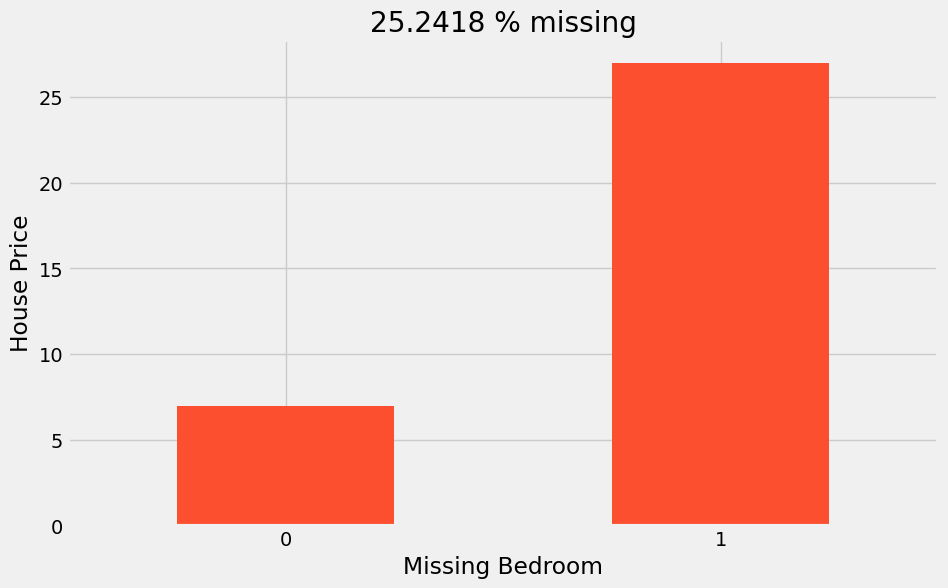

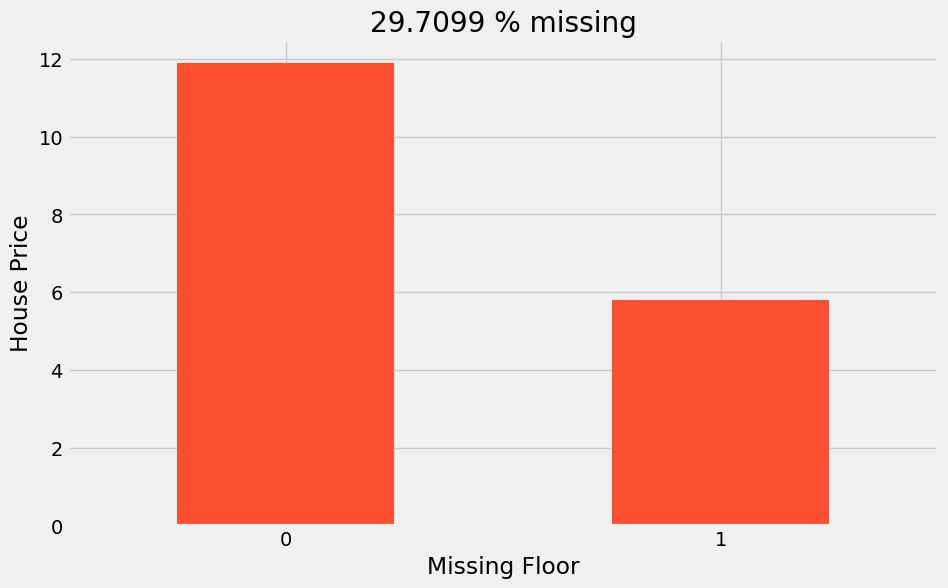

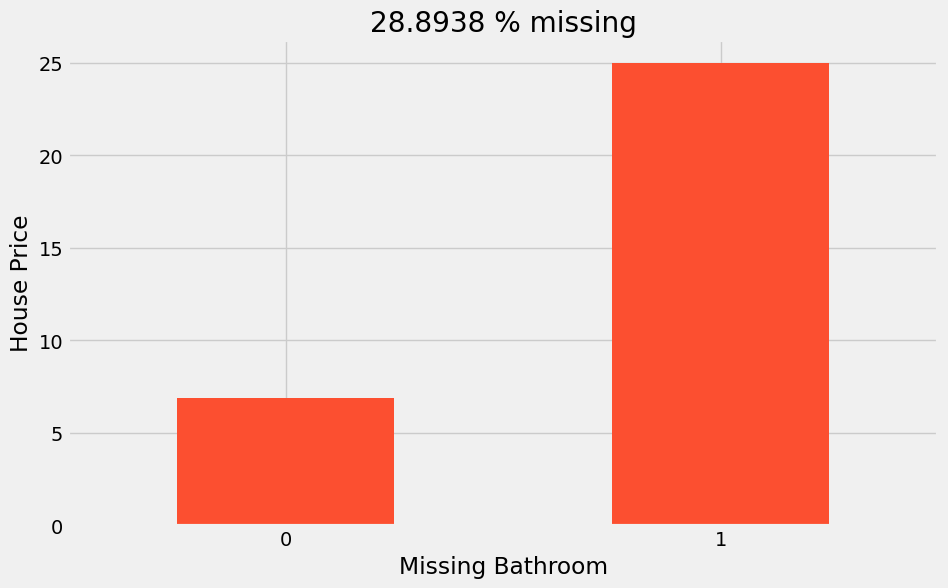

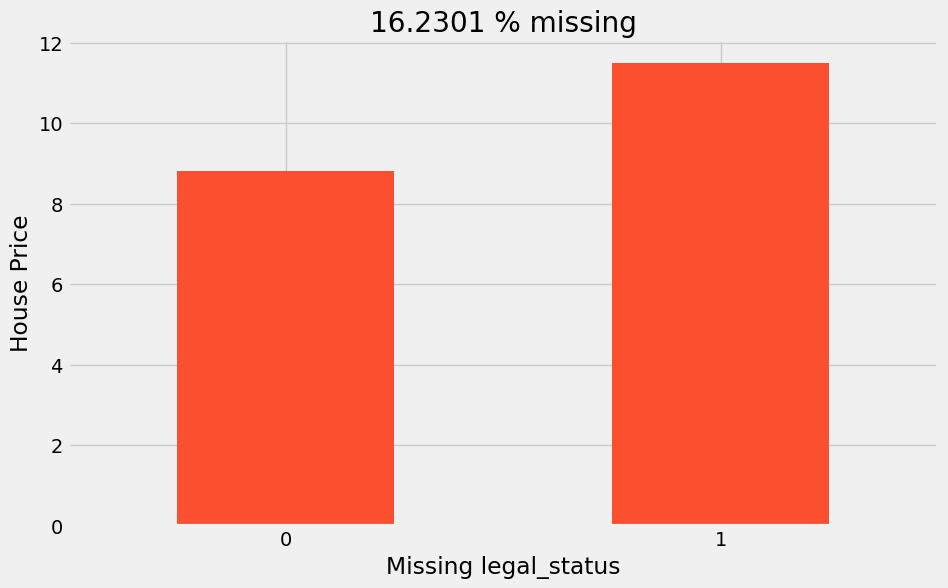

In [183]:
#Find the relationship between missing values and the House Price
for feature in features_with_na:
    data = df.copy()
    #Make a variable that indicates 1 if the observations was missing and 0 if not
    data[feature] = np.where(data[feature].isnull(),1,0)
    #Calculate the mean Price where the information is missing or not
    data.groupby(feature)['Price'].median().plot(kind='bar',figsize=(10,6),color=mypal[1])
    plt.ylabel('House Price')
    plt.xlabel(f'Missing {feature}')
    plt.xticks(rotation=0)
    plt.title(f'{np.round(df[feature].isnull().mean()*100,4)} % missing')
    plt.show()

In [184]:
#List of numerical variables
numerical_features = list(df.select_dtypes(include=['float','int']).columns)
print(f'Number of numerical variables: {len(numerical_features)}')
#Visualize the numerical variables
df[numerical_features].head()

Number of numerical variables: 18


,Price,Land Area,Bedroom,Floor,Bathroom,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2
0,69.0,210.0,NaN,5.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.328571
2,22.0,72.0,8.0,4.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305556
3,25.0,213.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.117371
6,15.5,108.0,4.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143519
7,6.2,50.0,4.0,3.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124000


In [185]:
#Display the summarize of descriptive statistics
df[numerical_features].describe()

,Price,Land Area,Bedroom,Floor,Bathroom,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2
count,19852.000000,19852.000000,14841.000000,13954.000000,14116.000000,19852.000000,19852.000000,19852.000000,19852.000000,19852.000000,19852.000000,19852.000000,19852.000000,19852.000000,19852.000000,19852.000000,19852.000000,1.985200e+04
mean,20.975880,155.404073,4.045280,3.331375,3.852224,0.422527,0.085432,0.061052,0.168950,0.061102,0.266976,0.180939,0.078884,0.287427,0.144368,0.003224,0.119333,1.536631e-01
std,39.767466,799.400973,6.562993,1.982611,6.620697,0.493974,0.279531,0.239431,0.374717,0.239524,0.442391,0.384977,0.269564,0.452574,0.351472,0.056689,0.324188,1.456455e-01
min,0.001000,1.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.325131e-08
25%,4.850000,60.100000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000e-02
50%,9.000000,85.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.121517e-01
75%,23.000000,138.000000,4.000000,4.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.880000e-01
max,899.000000,70000.000000,200.000000,24.000000,220.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.090909e+00


In [186]:
binary_features = [feature for feature in numerical_features if len(df[feature].dropna().unique())==2]
len(binary_features)

12

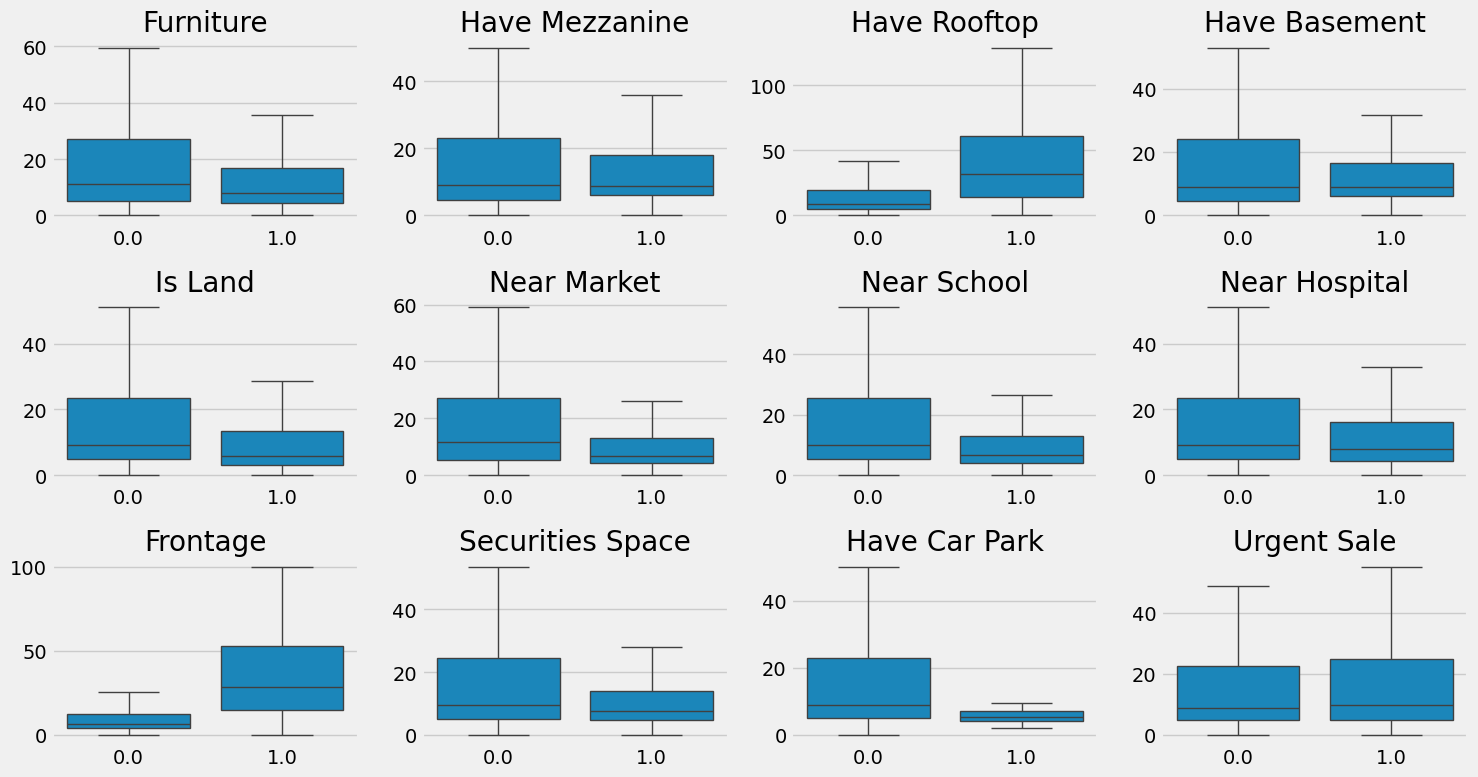

In [187]:
# Assuming binary_features and df are defined
num_features = len(binary_features)
rows = (num_features + 3) // 4  # Calculate needed rows

fig, axs = plt.subplots(rows, 4, figsize=(15, 8))
axs = axs.flatten()  # Flatten the array for easier indexing

for i, feature in enumerate(binary_features):
    sns.boxplot(x=feature, y='Price', data=df, showfliers=False, ax=axs[i])
    axs[i].set(ylabel='', xlabel='', title=feature)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [188]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=100\
    and feature not in binary_features]
discrete_features

['Bedroom', 'Floor', 'Bathroom']

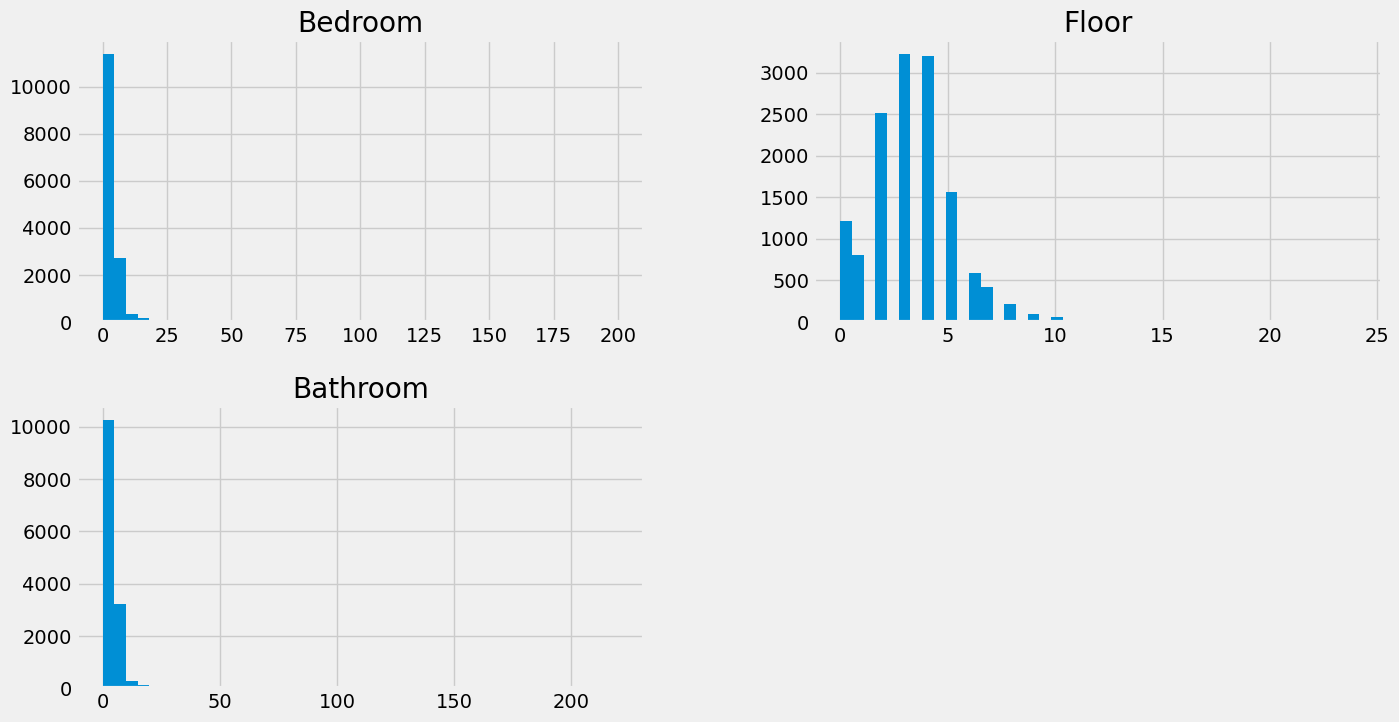

In [189]:
df[discrete_features].hist(bins=44,figsize=(15,8))
plt.show()

In [190]:
#Segment these discrete features
discrete_df = df[discrete_features]
discrete_df['Price'] = df['Price']
def room_mapping(room):
    if room == 0:
        return 'Land'
    elif room <= 5:
        return 'No more than 5'
    elif room <= 10:
        return 'No more than 10'
    elif room <= 20:
        return 'No more than 20'
    else:
        return 'More than 20'

def floor_mapping(floor):
    if floor == 0:
        return 'Land'
    elif floor <= 5:
        return 'No more than 5'
    else:
        return 'More than 5'

discrete_df['Bedroom'] = discrete_df['Bedroom'].apply(room_mapping)
discrete_df['Bathroom'] = discrete_df['Bathroom'].apply(room_mapping)
discrete_df['Floor'] = discrete_df['Floor'].apply(floor_mapping)

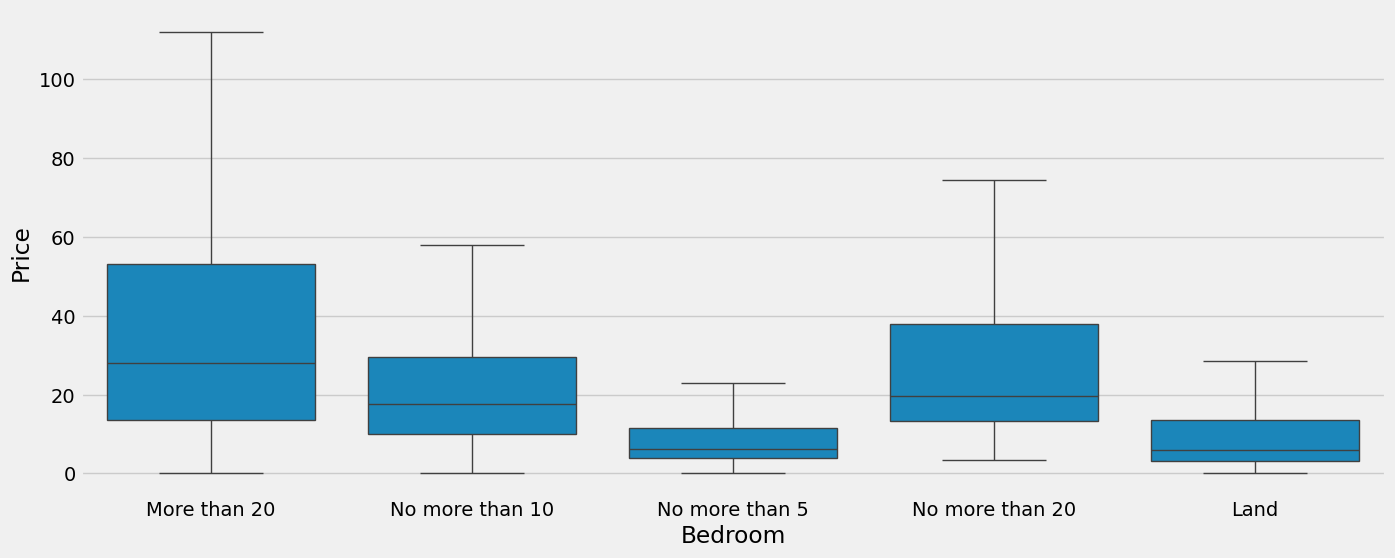

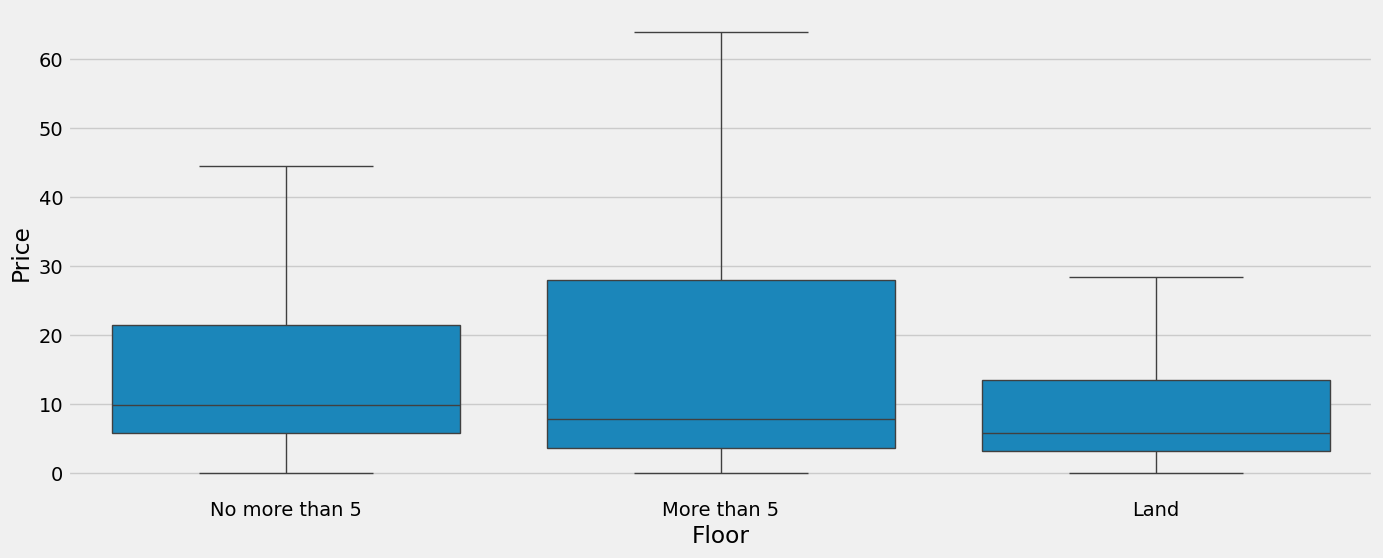

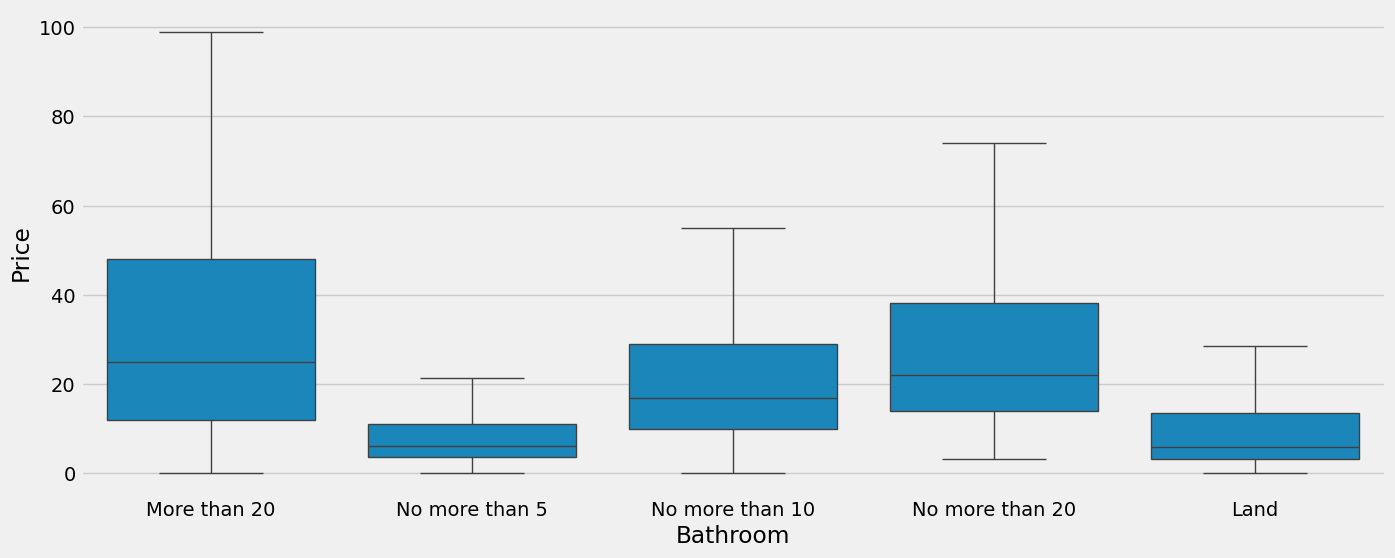

In [191]:
#Relationship between discrete variables and House Price
for feature in discrete_features:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=feature,y='Price',data=discrete_df,showfliers=False)
    plt.show()

In [192]:
continuous_features = [feature for feature in numerical_features if feature not in binary_features+discrete_features]
continuous_features

['Price', 'Land Area', 'Price/m2']

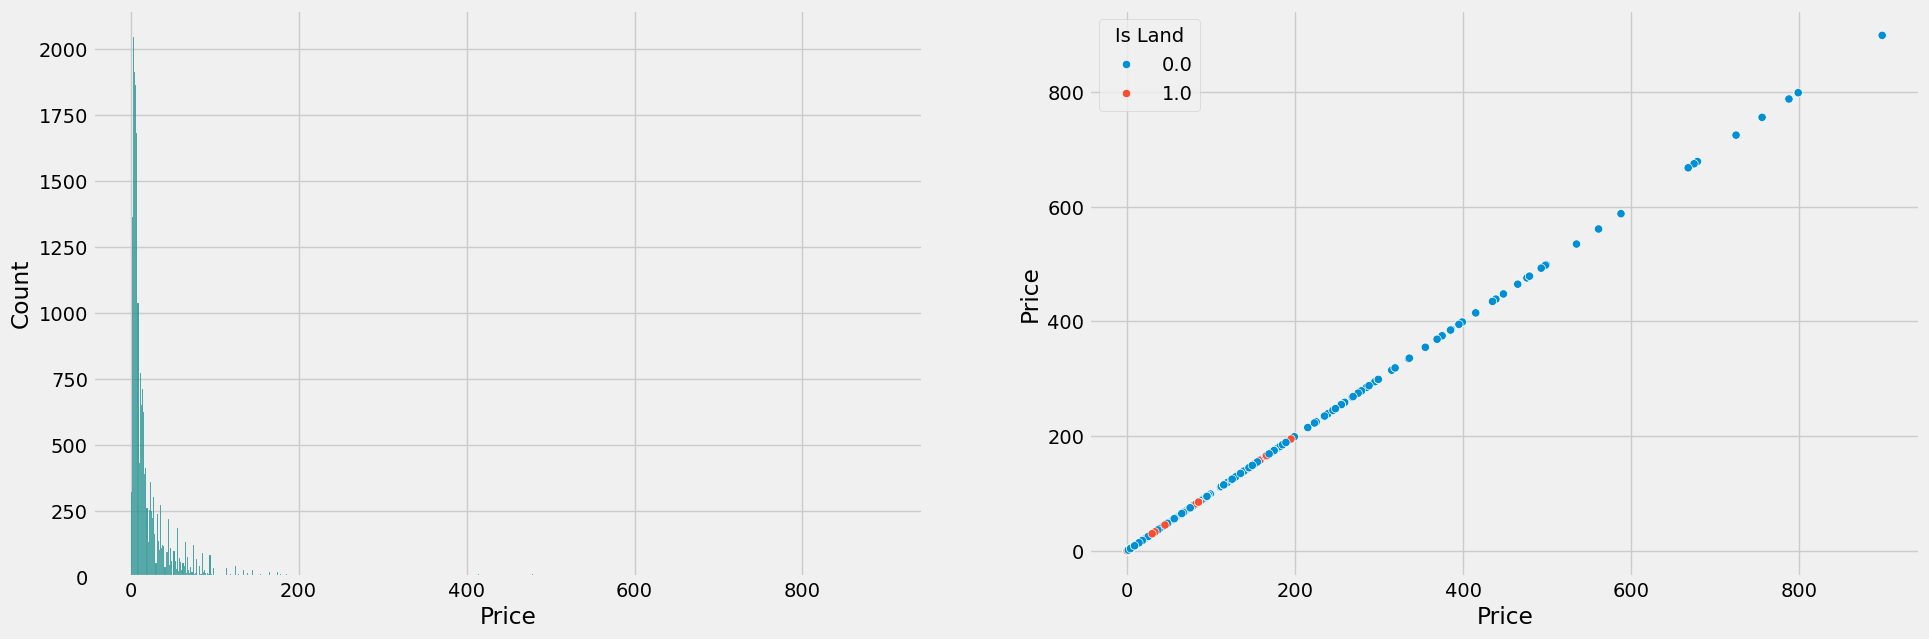

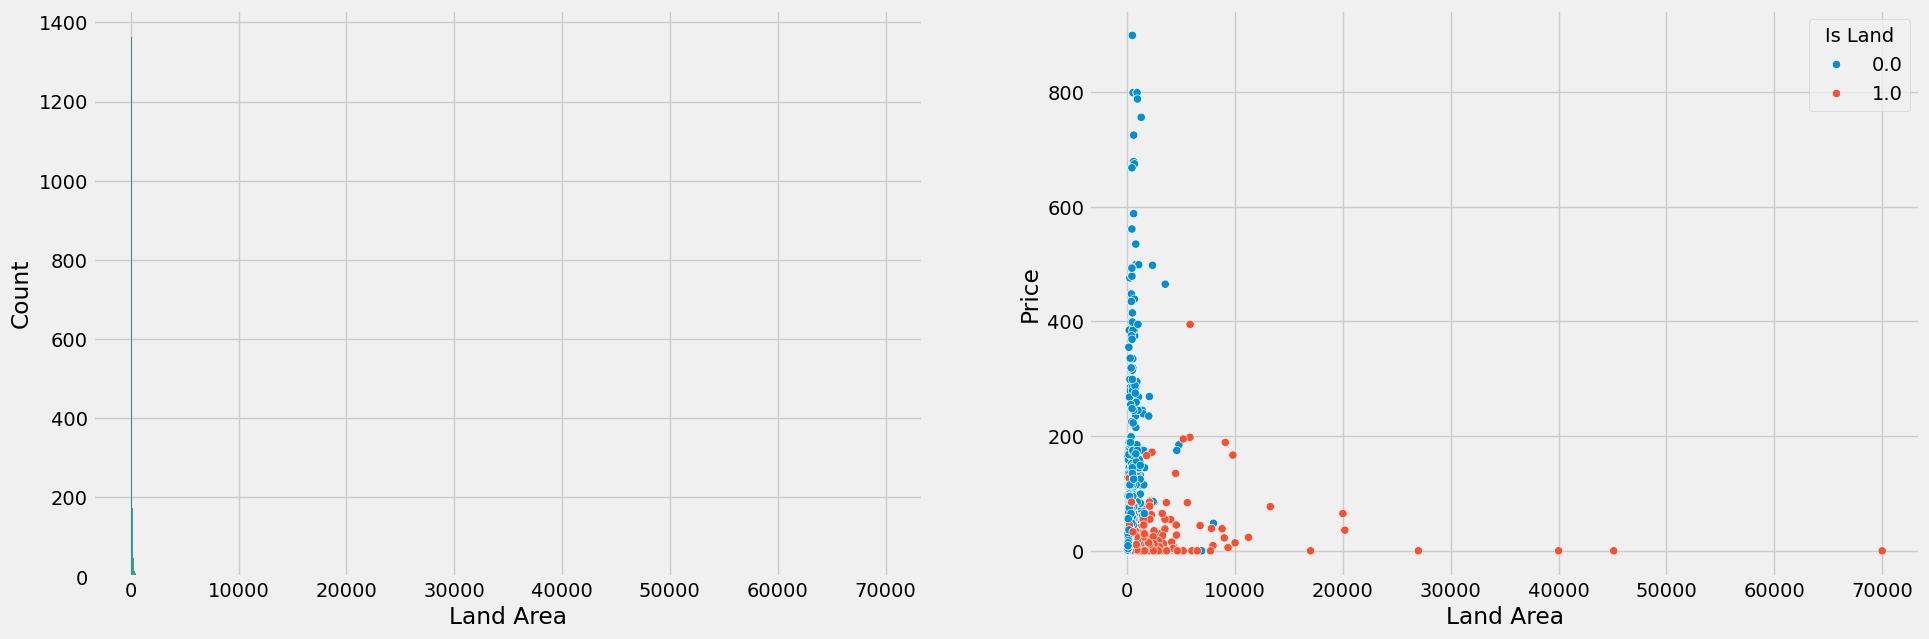

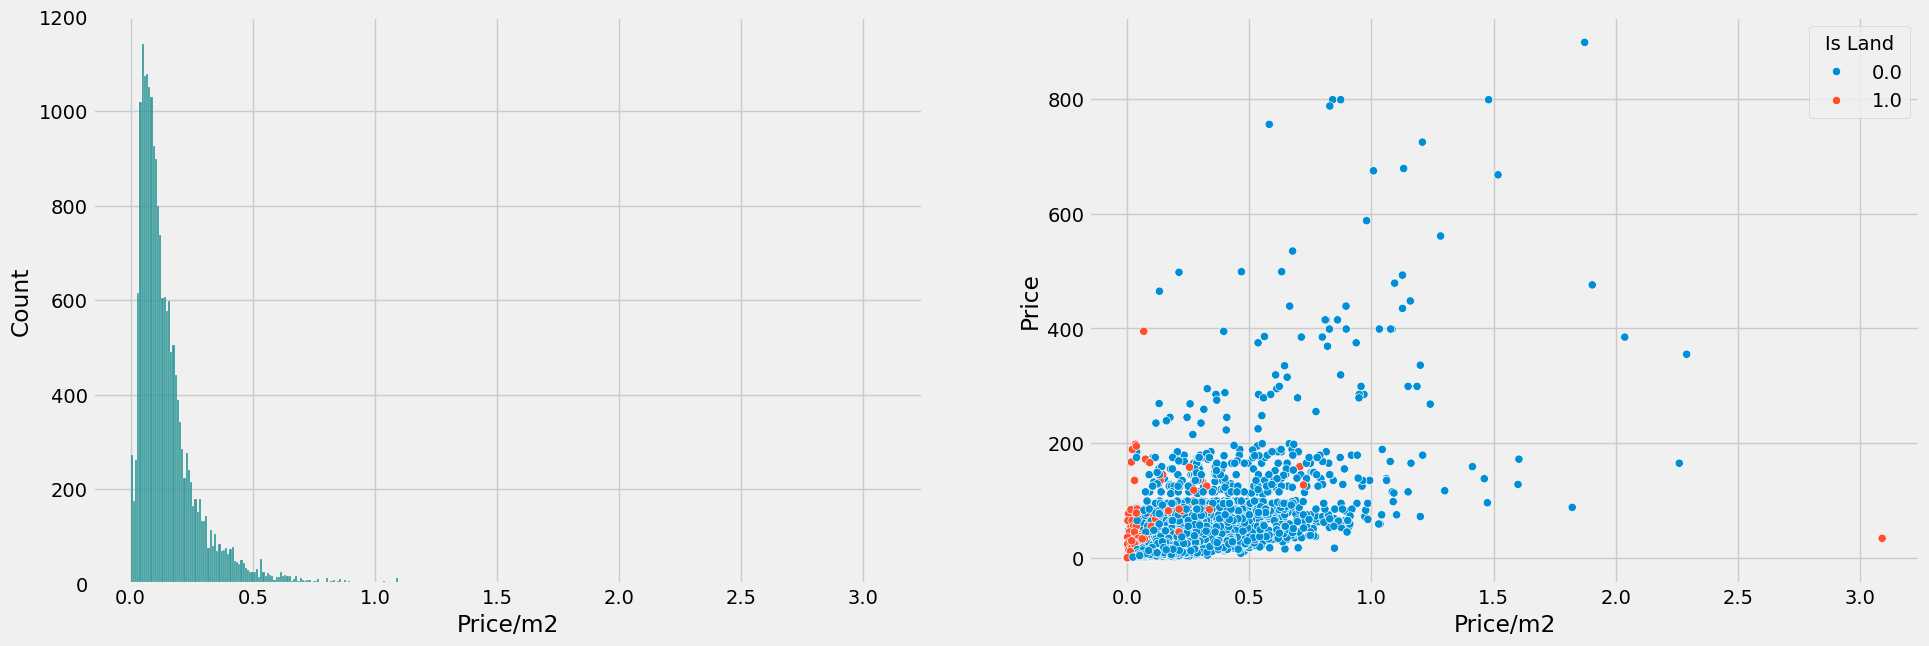

In [193]:
#Creating histogram to understand the distribution. Then analyze the relationship between the continuous values and House Price
for feature in continuous_features:
    plt.figure(figsize=(21,7))
    plt.subplot(121)
    sns.histplot(x=feature,data=df,color='teal')
    plt.subplot(122)
    sns.scatterplot(x=feature,y='Price',data=df,hue='Is Land')
    plt.show()

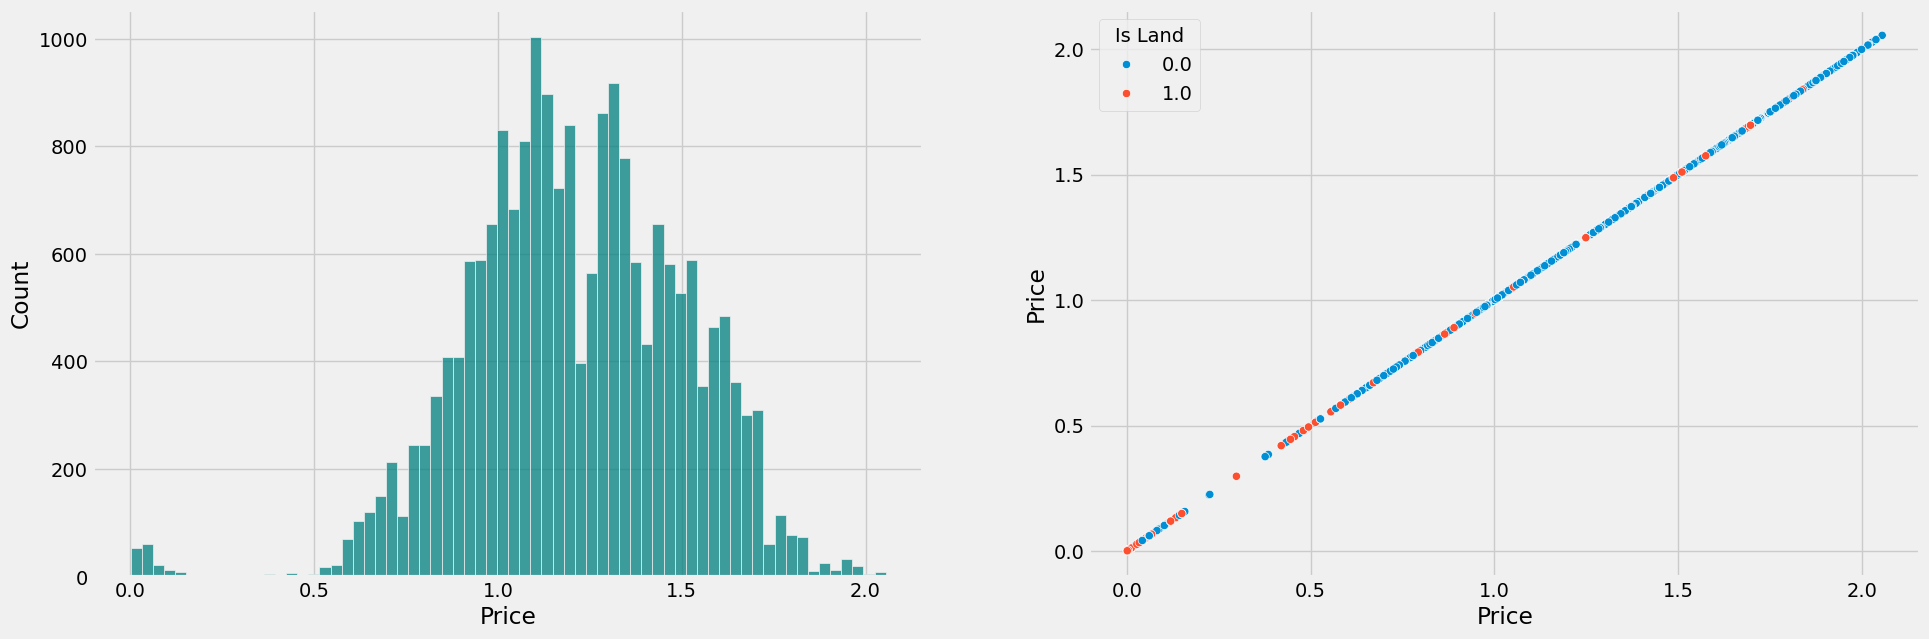

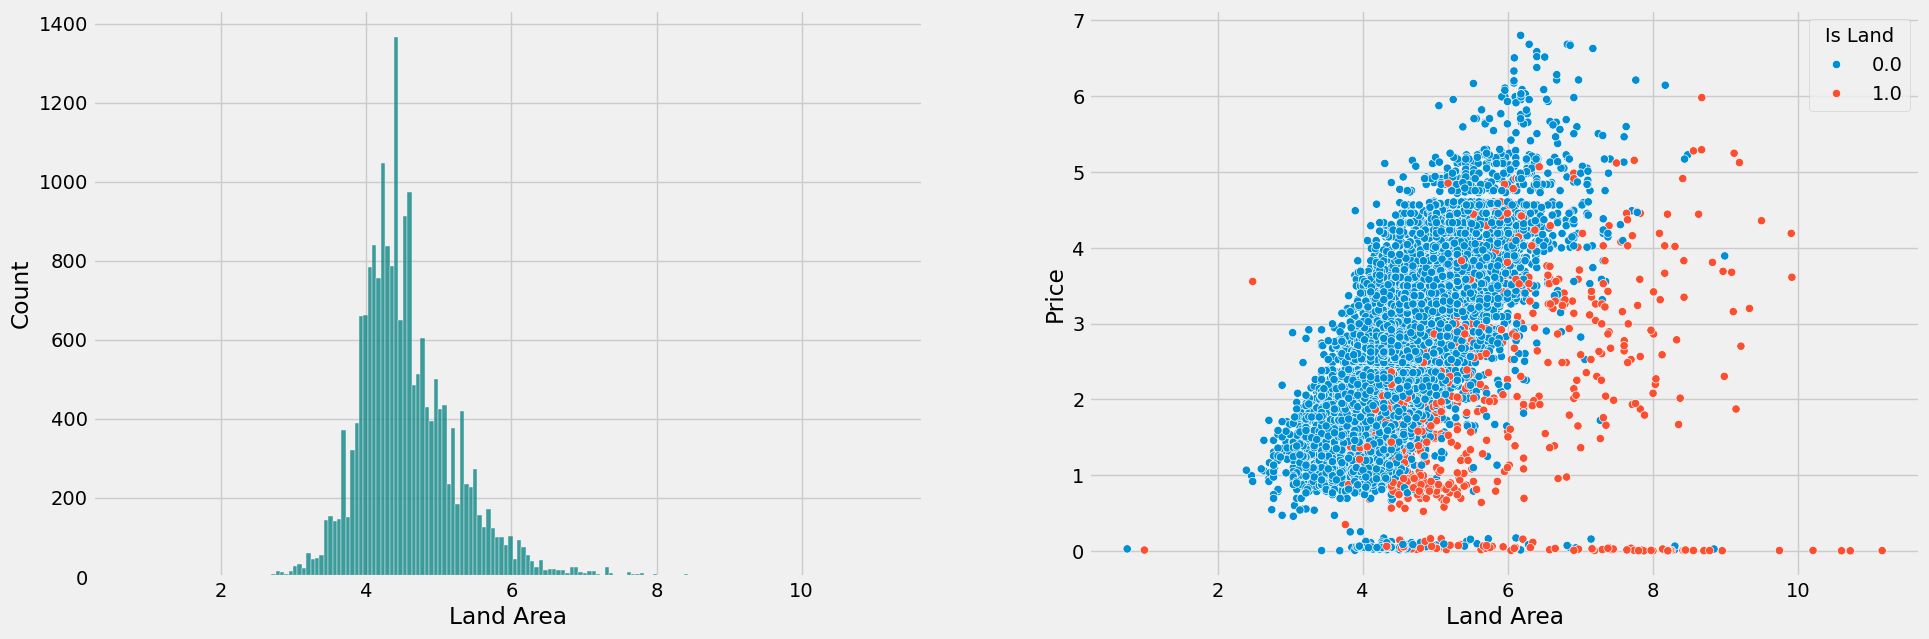

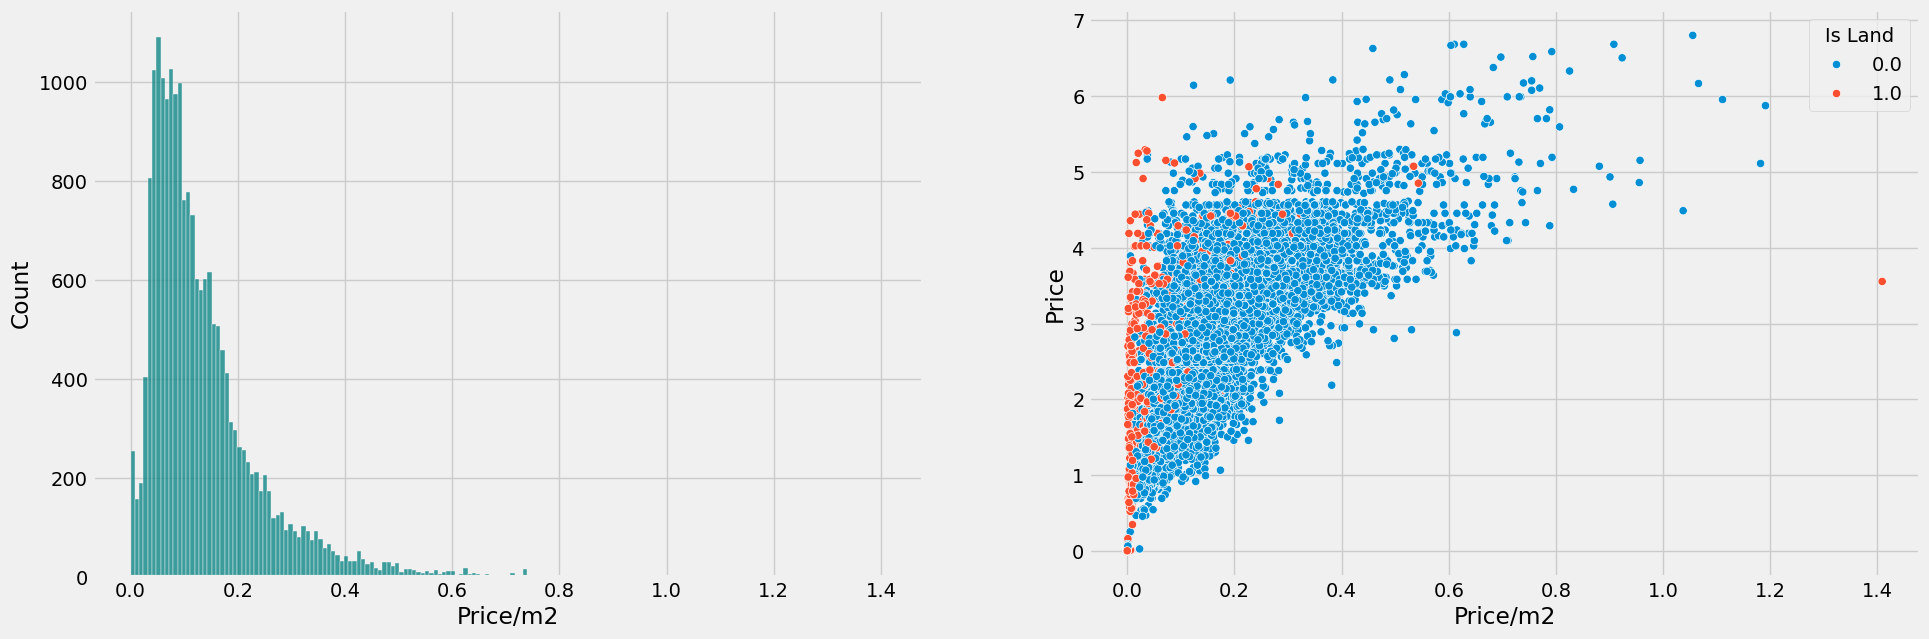

In [194]:
for feature in continuous_features:
    df_copy = df.copy()
    df_copy[feature] = np.log(df_copy[feature]+1)
    df_copy['Price'] = np.log(df_copy['Price']+1)
    plt.figure(figsize=(21,7))
    plt.subplot(121)
    sns.histplot(x=feature,data=df_copy,color='teal')
    plt.subplot(122)
    sns.scatterplot(x=feature,y='Price',data=df_copy,hue='Is Land')
    plt.show()

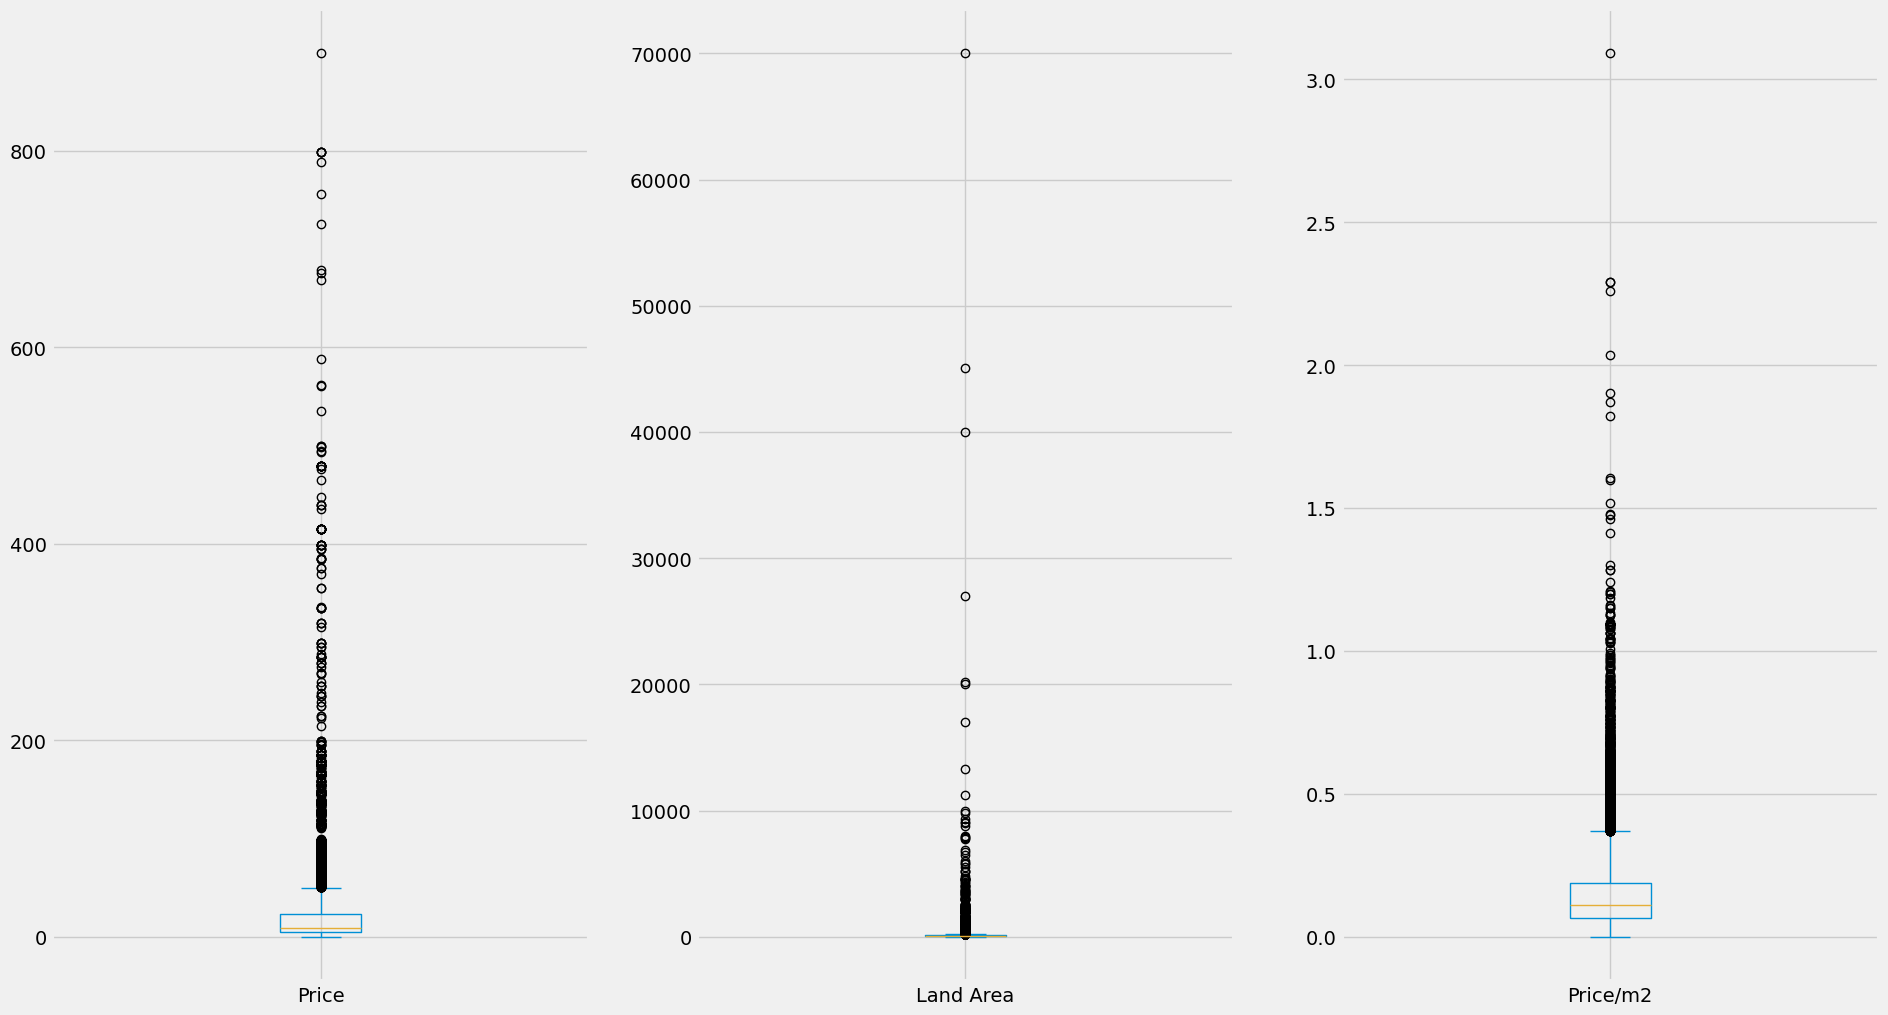

In [195]:
df[continuous_features].plot(kind='box',figsize=(21,12),subplots=True)
plt.show()

In [196]:
#List of categorical variables
categorical_features = list(df.select_dtypes(include='object').columns)
print(f'Number of categorical variables: {len(categorical_features)}')
#Visualize the categorical variables
df[categorical_features].head()

Number of categorical variables: 5


,District,Adress,Link,legal_status,Direction
0,quan 3,"Đường Lê Văn Sỹ, Phường 13",https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/Sổ hồng,Không xác định
2,quan 1,"Đường Trần Hưng Đạo, Phường Cô Giang",https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/Sổ hồng,Không xác định
3,tan phu,"Đường 30/4, Phường Tân Thành",https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/Sổ hồng,Nam
6,thu duc,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ",https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Bắc
7,nha be,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè",https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/Sổ hồng,Không xác định


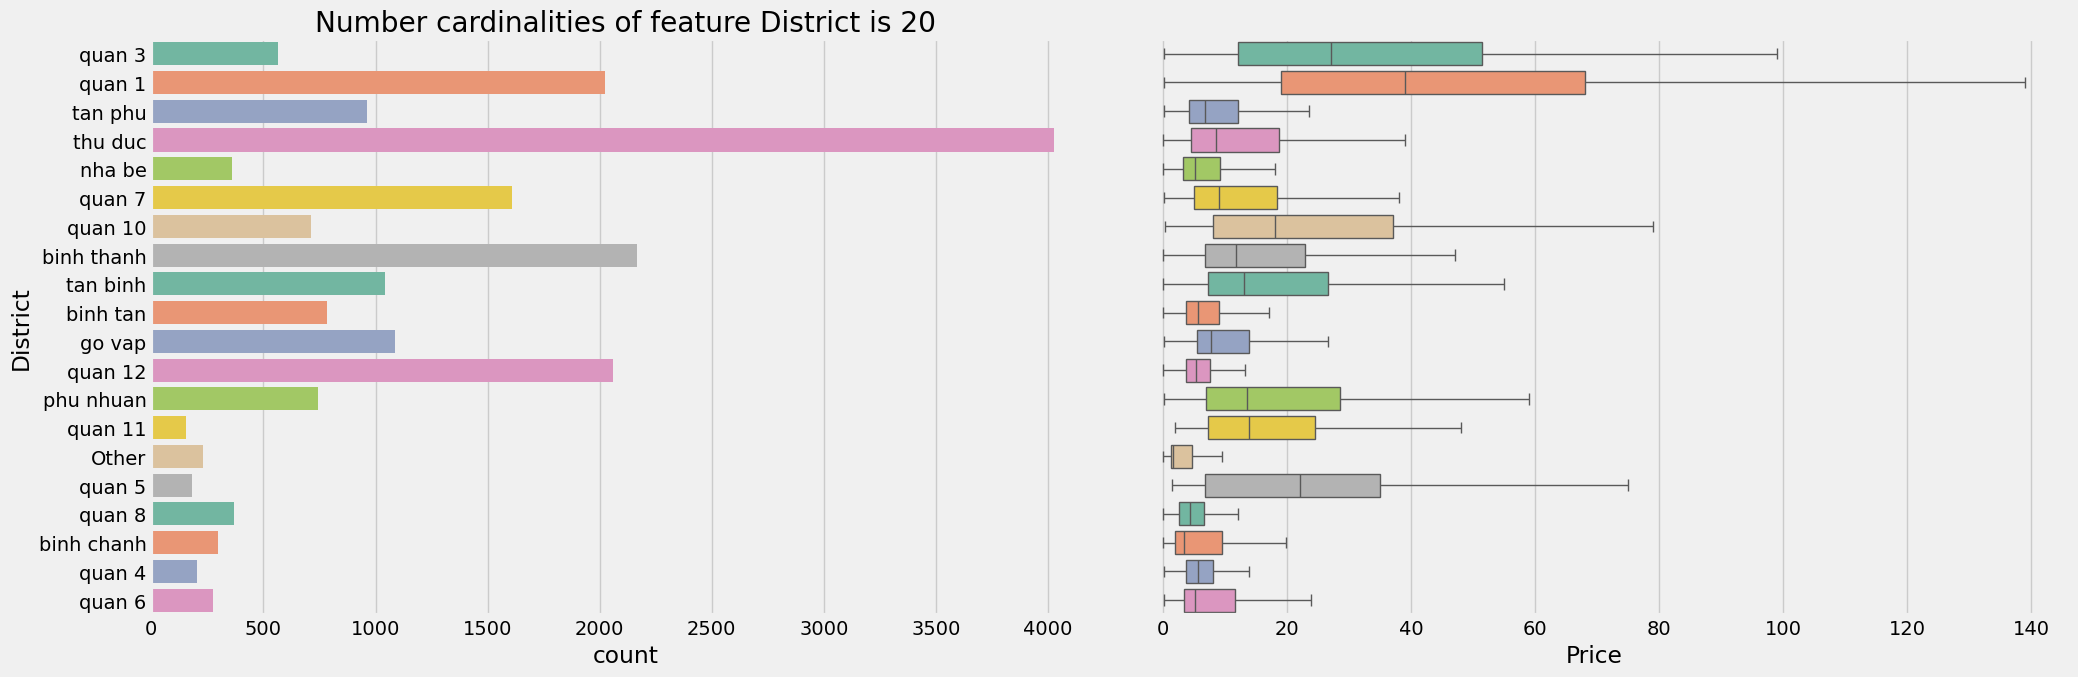

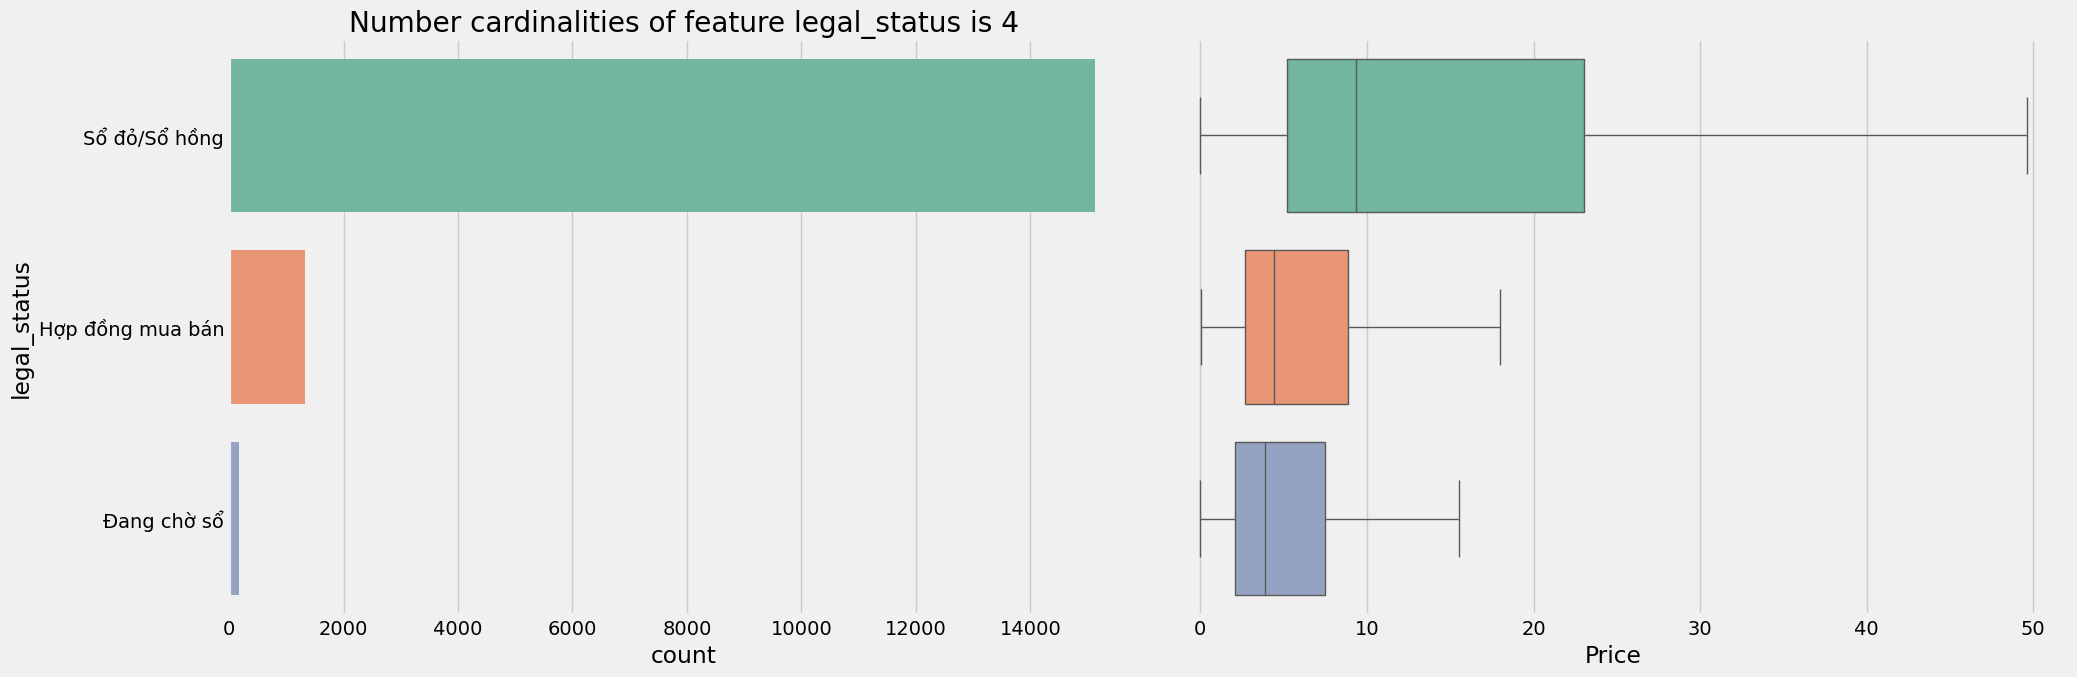

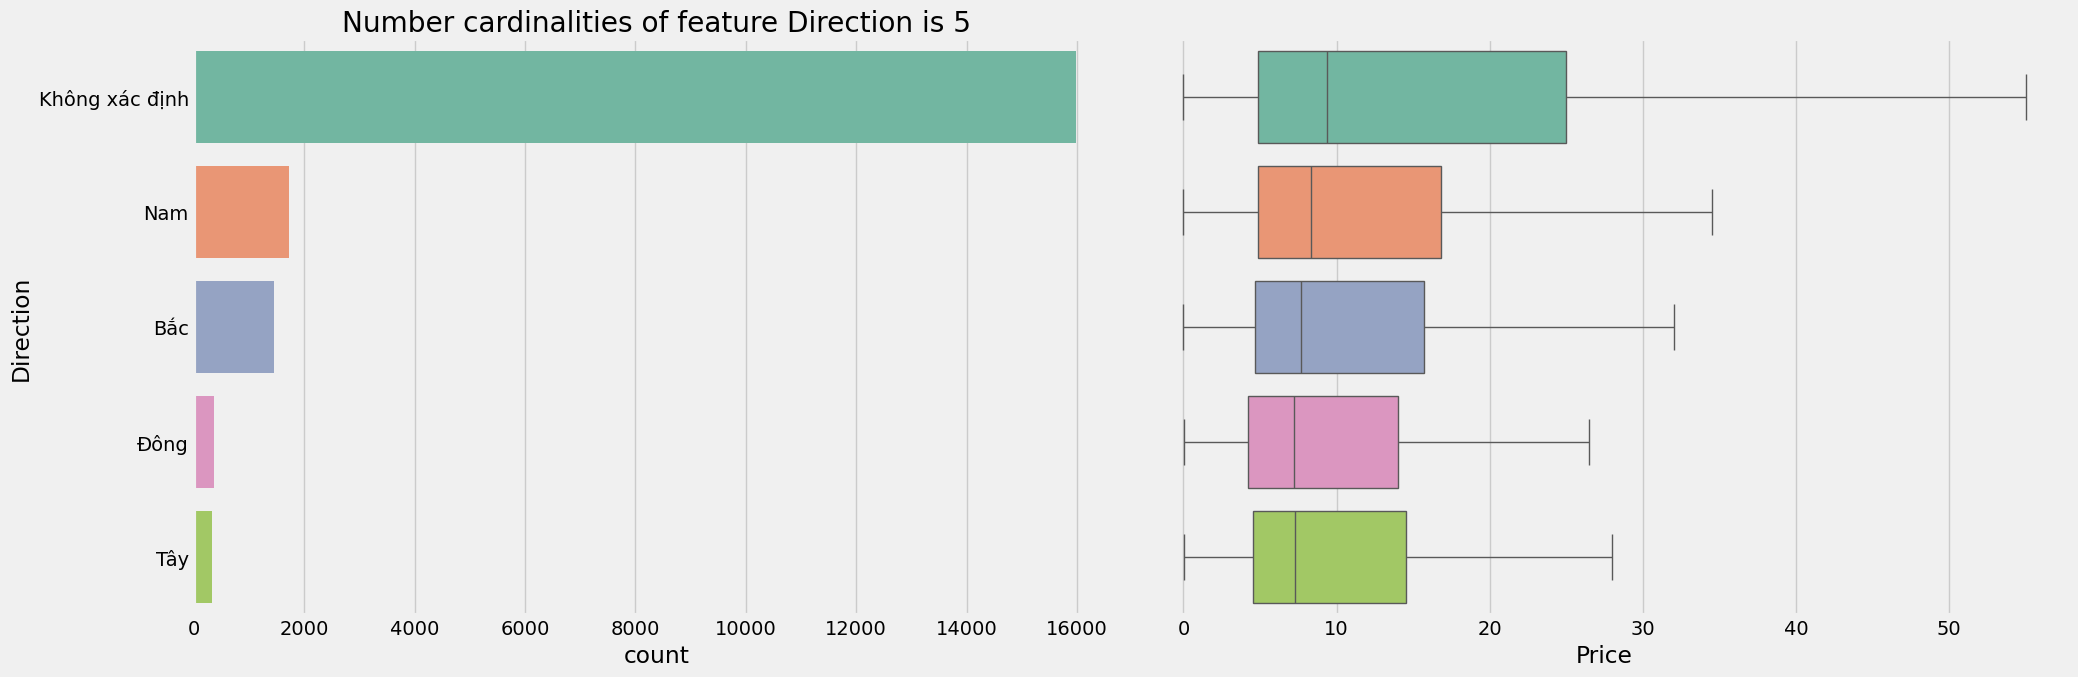

In [197]:
categorical_features = ['District', 'legal_status', 'Direction', 'Adress', 'Link']  # Thay thế bằng các cột phân loại của bạn

# Duyệt qua từng cột phân loại, bỏ qua 'Adress' và 'Link'
for feature in categorical_features:
    if feature not in ['Adress', 'Link']:
        df_copy = df.copy()
        fig, axs = plt.subplots(1, 2, figsize=(21, 7))
        
        # Biểu đồ đếm
        sns.countplot(y=feature, data=df_copy, palette='Set2', ax=axs[0])
        cardinality = len(df[feature].unique())
        axs[0].set_title(f'Number cardinalities of feature {feature} is {cardinality}')
        
        # Biểu đồ hộp
        sns.boxplot(y=feature, x='Price', data=df_copy, showfliers=False, palette='Set2', ax=axs[1])
        axs[1].get_yaxis().set_visible(False)
        
        plt.tight_layout()  # Tối ưu hóa bố cục của các biểu đồ
        plt.show()

In [198]:
df.to_csv('/Users/mac/crawdata/cleaned_data_new.csv',index=False)

## Data Feature 

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pandas.plotting import scatter_matrix
import warnings
import unidecode
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [200]:
old_df = pd.read_csv('/Users/mac/crawdata/cleaned_data_new.csv')
old_df.head()

,District,Adress,Price,Land Area,Bedroom,Floor,Bathroom,Link,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2
0,quan 3,"Đường Lê Văn Sỹ, Phường 13",69.0,210.0,NaN,5.0,NaN,https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/Sổ hồng,Không xác định,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.328571
1,quan 1,"Đường Trần Hưng Đạo, Phường Cô Giang",22.0,72.0,8.0,4.0,NaN,https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/Sổ hồng,Không xác định,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305556
2,tan phu,"Đường 30/4, Phường Tân Thành",25.0,213.0,1.0,1.0,1.0,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/Sổ hồng,Nam,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.117371
3,thu duc,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ",15.5,108.0,4.0,5.0,4.0,https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Bắc,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143519
4,nha be,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè",6.2,50.0,4.0,3.0,5.0,https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/Sổ hồng,Không xác định,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124000


In [201]:
old_df.drop('Adress',axis=1,inplace=True)

In [202]:
#Remove outlier 
def remove_outlier(df,column):
    df_temp = df.copy()
    mean = df_temp[column].mean()
    std = df_temp[column].std()
    left_tail = mean-3*std
    right_tail = mean+3*std
    print(f'Outliers of column {column} are outside the range from {left_tail} to {right_tail}')

    return df_temp[(df_temp[column] < left_tail) | (df_temp[column] > right_tail)].index

old_df.drop(remove_outlier(old_df,'Price'),inplace=True)
old_df.reset_index(drop=True,inplace=True)

Outliers of column Price are outside the range from -98.32651621449978 to 140.27827692777805


In [203]:
#List of categorical variables
categorical_features = list(old_df.select_dtypes(include='object').columns)
categorical_features

['District', 'Link', 'legal_status', 'Direction']

In [204]:
# List of categorical features to encode
categorical_features = ['District', 'Adress', 'Link', 'legal_status', 'Direction']  

# Label encoding
for feature in categorical_features:
    if feature not in ['Link', 'Adress']:  # Corrected condition
        labels_ordered = old_df.groupby([feature])['Price'].median().sort_values().index
        labels_ordered = {k: i for i, k in enumerate(labels_ordered, 0)}
        old_df[feature] = old_df[feature].map(labels_ordered)

# Display the updated DataFrame
print(old_df)

       District  Price  Land Area  Bedroom  Floor  Bathroom  \
0            18  69.00      210.0      NaN    5.0       NaN   
1            19  22.00       72.0      8.0    4.0       NaN   
2             8  25.00      213.0      1.0    1.0       1.0   
3            10  15.50      108.0      4.0    5.0       4.0   
4             3   6.20       50.0      4.0    3.0       5.0   
...         ...    ...        ...      ...    ...       ...   
19584         8  15.00       80.0      6.0    4.0       7.0   
19585        13  17.99      120.0      NaN    NaN       NaN   
19586        10  14.00       87.8      4.0    3.0       5.0   
19587         8   8.80       72.0      NaN    3.0       NaN   
19588        10  29.70     1600.0      0.0    0.0       0.0   

                                                                                                                                                                                          Link  \
0                                  https://batdon

In [205]:
old_df['Category'] = old_df['Link']
old_df.drop('Link',axis=1,inplace=True)

In [206]:
skewed_features = ['Land Area']
df = old_df.copy()
df[skewed_features] = np.log(df[skewed_features]+1)

In [207]:
#Make the list of features which has missing values
features_with_na = [col for col in df.columns if (df[col].isnull().sum()>0)]
#Print the features name and the percentage of missing values
for feature in features_with_na:
    print(f'{feature}: {np.round(df[feature].isnull().mean()*100,4)} % missing values')

Bedroom: 24.6924 % missing values
Floor: 29.828 % missing values
Bathroom: 28.368 % missing values
legal_status: 16.0039 % missing values


In [208]:
# Calculate the correlation matrix using only numeric columns
corr = old_df.corr(numeric_only=True).abs()

# Display the correlation matrix with a background gradient
corr.style.background_gradient(cmap='coolwarm')

,District,Price,Land Area,Bedroom,Floor,Bathroom,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2
District,1.000000,0.438627,0.072372,0.139815,0.389046,0.137514,0.097636,0.138680,0.014791,0.007366,0.065320,0.011573,0.201386,0.107720,0.122850,0.019075,0.281596,0.013293,0.022137,0.036121,0.605565
Price,0.438627,1.000000,0.077790,0.388987,0.409252,0.387217,0.135160,0.092416,0.122007,0.029913,0.199387,0.058821,0.063977,0.174307,0.152678,0.061496,0.523898,0.103411,0.026936,0.015437,0.685851
Land Area,0.072372,0.077790,1.000000,0.011020,0.078238,0.011825,0.021288,0.001784,0.047702,0.021765,0.006764,0.035085,0.163246,0.027215,0.013556,0.009269,0.009760,0.002618,0.005785,0.001894,0.041002
Bedroom,0.139815,0.388987,0.011020,1.000000,0.511860,0.926835,0.097201,0.035868,0.043407,0.084874,0.125797,0.100390,0.220943,0.051224,0.025049,0.007210,0.253032,0.020430,0.006723,0.010480,0.285699
Floor,0.389046,0.409252,0.078238,0.511860,1.000000,0.519061,0.025441,0.116053,0.121222,0.133421,0.209731,0.200866,0.541866,0.105058,0.104526,0.027705,0.372639,0.041632,0.019859,0.016721,0.498813
Bathroom,0.137514,0.387217,0.011825,0.926835,0.519061,1.000000,0.102026,0.029172,0.054087,0.093608,0.123451,0.127977,0.213251,0.056092,0.028338,0.014773,0.244579,0.016213,0.006125,0.013262,0.290507
legal_status,0.097636,0.135160,0.021288,0.097201,0.025441,0.102026,1.000000,0.072904,0.158170,0.065144,0.037987,0.098597,0.074968,0.013929,0.018389,0.013678,0.171240,0.025033,0.013207,0.015751,0.169310
Direction,0.138680,0.092416,0.001784,0.035868,0.116053,0.029172,0.072904,1.000000,0.164540,0.014311,0.004655,0.006871,0.071439,0.006965,0.037060,0.004303,0.088678,0.007020,0.010622,0.035304,0.098595
Furniture,0.014791,0.122007,0.047702,0.043407,0.121222,0.054087,0.158170,0.164540,1.000000,0.008238,0.022887,0.049426,0.218023,0.016287,0.031374,0.052432,0.121130,0.056052,0.014160,0.024565,0.083269
Have Mezzanine,0.007366,0.029913,0.021765,0.084874,0.133421,0.093608,0.065144,0.014311,0.008238,1.000000,0.008160,0.223175,0.066281,0.038593,0.027023,0.026485,0.016033,0.005710,0.007976,0.025778,0.060271


Using RandomForest to fill missing value

In [209]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

def complete_na(data, feature_na, features_pred):
 
    df = data[features_pred + [feature_na]].copy()
    
    df.dropna(inplace=True)

    if len(df) < 2:
        raise ValueError("Not enough data to train the model.")
    
    X = df[features_pred]
    y = df[feature_na]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3107)

    pipeline = Pipeline(steps=[
        ('model', RandomForestRegressor(n_estimators=100, random_state=3107))
    ])

    pipeline.fit(X_train, y_train)

    return pipeline

In [210]:
df.loc[df['Floor'].isnull(), 'Floor'] = complete_na(df, feature_na='Floor', features_pred=['Bathroom', 'Bedroom', 'Price/m2']) \
    .predict(df.loc[df['Floor'].isnull(), ['Bathroom', 'Bedroom', 'Price/m2']])

df.loc[df['Bathroom'].isnull(), 'Bathroom'] = complete_na(df, feature_na='Bathroom', features_pred=['Floor', 'Bedroom']) \
    .predict(df.loc[df['Bathroom'].isnull(), ['Floor', 'Bedroom']])

df.loc[df['Bedroom'].isnull(), 'Bedroom'] = complete_na(df, feature_na='Bedroom', features_pred=['Bathroom']) \
    .predict(df.loc[df['Bedroom'].isnull(), ['Bathroom']])

In [211]:
#Drop others missing values
df.dropna(inplace=True)
old_df = old_df.loc[df.index]
df.reset_index(drop=True,inplace=True)
old_df.reset_index(drop=True,inplace=True)

In [212]:
#Extract information from header
def return_index_category(df_temp,column,key):
    index = df_temp[df_temp[column].str.lower().str.contains(key)].index
    df_temp.drop(index,inplace=True)

    return index

#Create temporary data frame and a list for saving information from header
short_category = np.empty(len(df),dtype='object')
temp = df.copy()
land_index = temp[temp['Is Land']==1].index
short_category[land_index] = 'land'
temp.drop(land_index,inplace=True)

short_category[return_index_category(temp,'Category','shophouse')] = 'shophouse'
short_category[return_index_category(temp,'Category','nha-hem')] = 'house'
short_category[return_index_category(temp,'Category','nha-mat-pho')] = 'townhouse'
short_category[return_index_category(temp,'Category','khach-san')] = 'hotel-villa'
short_category[return_index_category(temp,'Category','nha-rieng')] = 'house'
short_category[return_index_category(temp,'Category','can-ho')] = 'condominium'
short_category[return_index_category(temp,'Category','nguyen can')] = 'condominium'
short_category[return_index_category(temp,'Category','biet-thu')] = 'hotel-villa'
short_category[return_index_category(temp,'Category','chung-cu')] = 'condominium'
short_category[temp.index] = 'others'

#Re-assigned to Category column
df['Category'] = short_category
old_df['Category'] = short_category

In [213]:
df['Category'].value_counts()

Category
house          5878
townhouse      4263
condominium    3751
land           1197
hotel-villa    1185
shophouse       179
others            1
Name: count, dtype: int64

In [214]:
df = df[df['Category'].isin(['house','townhouse','hotel-villa','shophouse','condominium','land'])]
old_df = old_df[old_df['Category'].isin(['house','townhouse','hotel-villa','shophouse','condominium','land'])]
df.reset_index(drop=True,inplace=True)
old_df.reset_index(drop=True,inplace=True)

In [215]:
df.drop('Is Land',axis=1,inplace=True)
old_df.drop('Is Land',axis=1,inplace=True)

In [216]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
# split into input and output elements
X, y = df.drop('Category',axis=1), df['Category']
# transform the dataset
strategy = {'house':5900, 'land':1200, 'condominium':3800, 'townhouse':4300, 'hotel-villa':1200, 'shophouse': 180}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

df = pd.merge(X,y,left_index=True,right_index=True)
df

,District,Price,Land Area,Bedroom,Floor,Bathroom,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2,Category
0,18,69.000000,5.351858,4.000000,5.000000,3.930908,2.0,4,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.00000,0.0,0.00000,0.328571,townhouse
1,19,22.000000,4.290459,8.000000,4.000000,7.589673,2.0,4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.305556,house
2,8,25.000000,5.365976,1.000000,1.000000,1.000000,2.0,3,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.00000,0.0,0.00000,0.117371,townhouse
3,10,15.500000,4.691348,4.000000,5.000000,4.000000,1.0,2,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.143519,hotel-villa
4,3,6.200000,3.931826,4.000000,3.000000,5.000000,2.0,4,1.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.124000,house
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16575,14,18.678539,4.272730,3.000000,4.000000,3.448517,2.0,4,0.000000,0.0,0.0,0.0,0.196349,0.0,0.0,1.0,0.00000,0.0,0.00000,0.264770,townhouse
16576,16,11.589942,4.010233,3.000000,4.449710,3.696524,2.0,4,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.44971,0.0,0.44971,0.214040,townhouse
16577,19,97.897562,5.461437,4.886538,7.897562,5.042531,2.0,4,0.551219,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.00000,0.0,0.00000,0.417593,townhouse
16578,6,12.000000,4.692897,4.400855,4.000000,5.000000,2.0,3,0.599145,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.00000,0.0,0.00000,0.111170,townhouse


In [217]:
df['Category'].value_counts()

Category
house          5900
townhouse      4300
condominium    3800
hotel-villa    1200
land           1200
shophouse       180
Name: count, dtype: int64

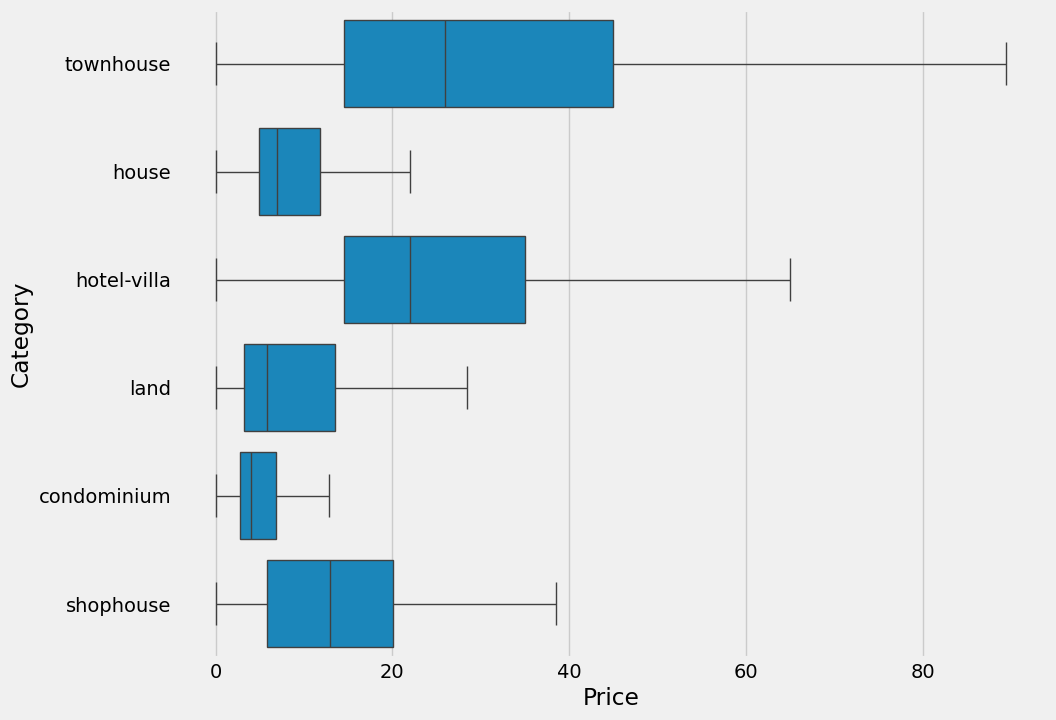

In [218]:
#Relationship between Category and House Price
plt.figure(figsize=(10,8))
sns.boxplot(y='Category',x='Price',data=df,showfliers=False)
plt.show()

Sử dụng đồ thị Elbow để nhóm các dữ liệu ngoại trừ giá theo kmean tối ưu nhất 


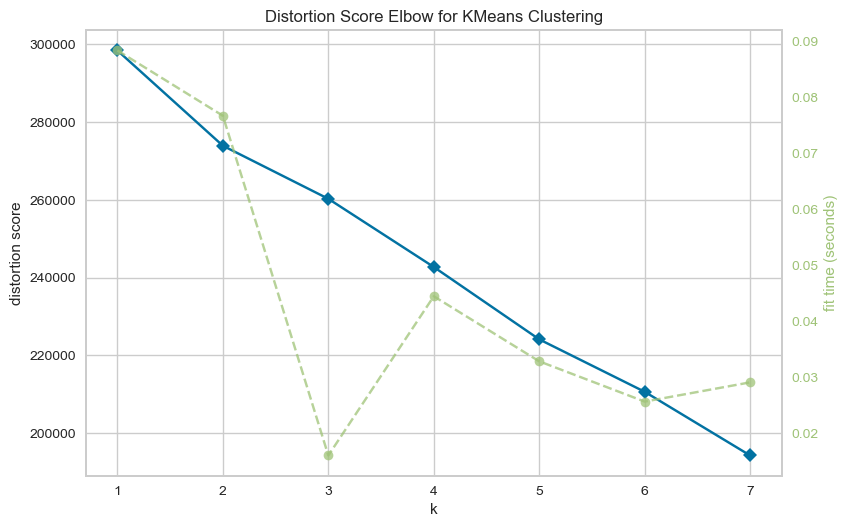

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [219]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

cluster_df = df.copy()
cluster_df = cluster_df.select_dtypes(exclude='O')

#Scale data
scaler = StandardScaler()
scale_df = pd.DataFrame(scaler.fit_transform(cluster_df),columns=cluster_df.columns)
X = scale_df.drop(['Price','Price/m2'],axis=1)

#Find the best k cluster
kmeans = KMeans(random_state=50)  
visualizer = KElbowVisualizer(kmeans, k=(1,8))
visualizer.fit(X)
visualizer.show()

In [220]:
#Use k = 2
kmeans = KMeans(n_clusters=2,max_iter=500)
kmeans.fit(X)
#Segmentation
df['Cluster'] = kmeans.predict(X)

In [221]:
#PCA for visualization
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] 
pca = PCA(n_components=2)
pca_df = pd.DataFrame(pca.fit_transform(X))
pca_df['Cluster'] = df['Cluster']
pca_df['Category'] = df['Category']

pca_df.head()

,0,1,Cluster,Category
0,1.967143,-1.188925,1,townhouse
1,1.560619,-0.653148,1,house
2,-0.453312,-1.438431,1,townhouse
3,0.016700,-0.385098,1,hotel-villa
4,0.030001,0.467246,1,house


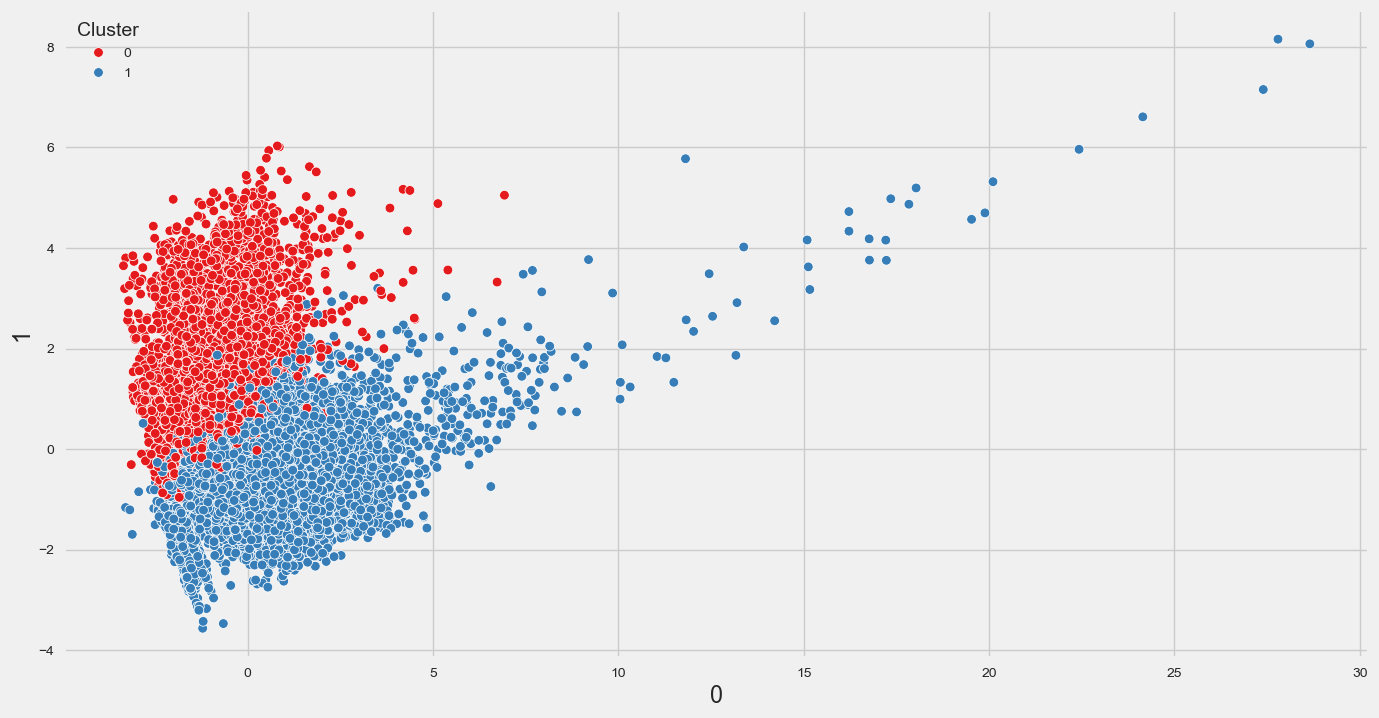

In [222]:
#PCA based on KMeans
plt.figure(figsize=(15,8))
sns.scatterplot(x=0,y=1,data=pca_df,hue=pca_df['Cluster'],palette='Set1')
plt.show()

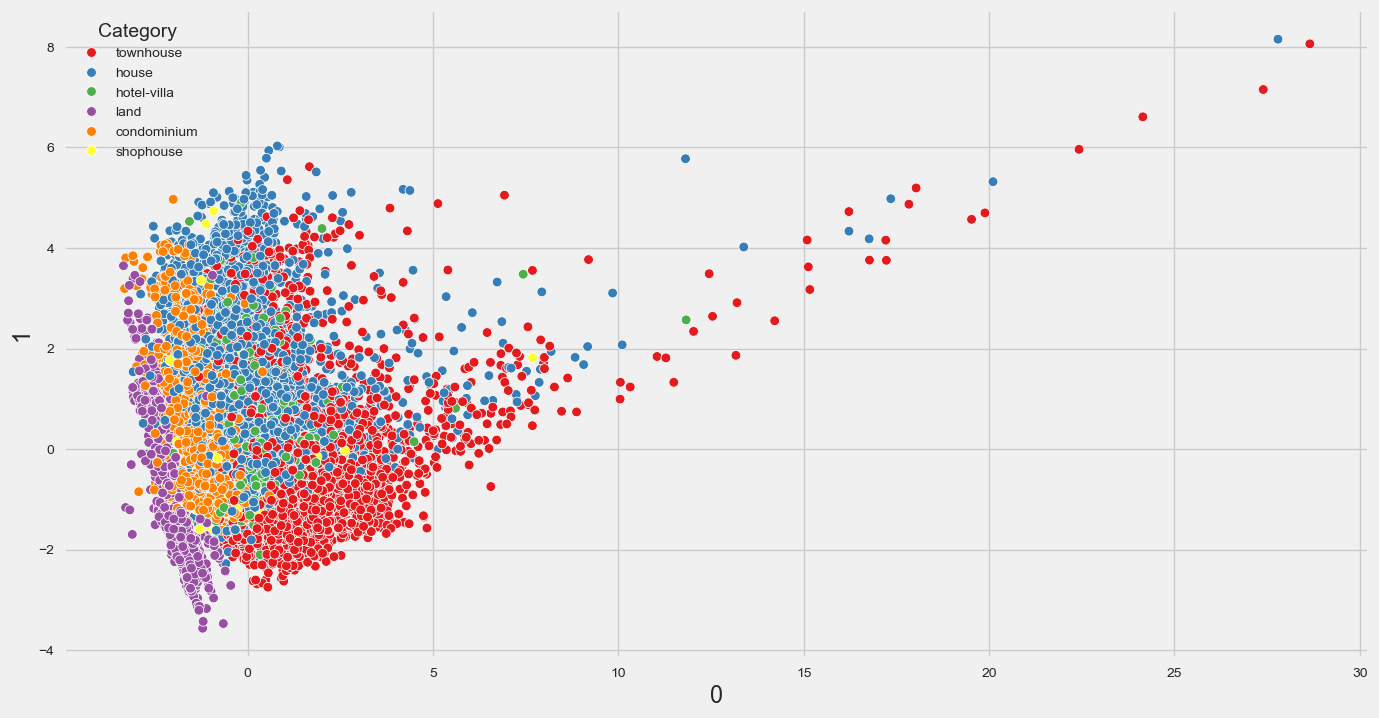

In [223]:
#PCA based on Category
plt.figure(figsize=(15,8))
sns.scatterplot(x=0,y=1,data=pca_df,hue=df['Category'],palette='Set1')
plt.show()

In [224]:
#Encoding Category columns
labels_ordered=df.groupby(['Category'])['Price'].median().sort_values().index
labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}

old_df['Category'] = old_df['Category'].map(labels_ordered)
df['Category'] = df['Category'].map(labels_ordered)

In [225]:
land_df = df.loc[df['Category']==0].reset_index(drop=True)
home_df = df.loc[df['Category']!=0].reset_index(drop=True)

In [226]:
#Remove cluster column
home_df.drop('Cluster',axis=1,inplace=True)
land_df.drop('Cluster',axis=1,inplace=True)

In [227]:
land_df.describe().loc[['std']]

,District,Price,Land Area,Bedroom,Floor,Bathroom,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2,Category
std,3.752778,7.18818,0.397796,0.789714,0.557293,0.704058,0.550626,0.909991,0.479102,0.079231,0.243123,0.151263,0.440346,0.371789,0.258778,0.0,0.30764,0.02809,0.342018,0.041246,0.0


In [228]:
home_df.describe().loc[['std']]

,District,Price,Land Area,Bedroom,Floor,Bathroom,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2,Category
std,4.442883,21.602918,0.747661,4.936135,1.779564,5.15309,0.16671,0.888603,0.498479,0.301869,0.231527,0.401269,0.438707,0.39021,0.276831,0.472707,0.361847,0.060288,0.323273,0.122076,1.504459


In [229]:
land_df.drop([
    'Category','Bedroom','Bathroom','Floor','Have Mezzanine','Have Rooftop','Have Basement','Frontage'
],axis=1,inplace=True)

In [230]:
corr = land_df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,District,Price,Land Area,legal_status,Direction,Furniture,Near Market,Near School,Near Hospital,Securities Space,Have Car Park,Urgent Sale,Price/m2
District,1.000000,0.241636,0.145558,0.078784,0.005703,0.028492,0.058874,0.093375,0.007700,0.030584,0.027837,0.003685,0.346841
Price,0.241636,1.000000,0.656355,0.001053,0.027450,0.026634,0.135095,0.108175,0.048279,0.051765,0.012926,0.054866,0.789124
Land Area,0.145558,0.656355,1.000000,0.085945,0.045755,0.020244,0.073484,0.038659,0.010819,0.031147,0.021552,0.003748,0.308216
legal_status,0.078784,0.001053,0.085945,1.000000,0.090447,0.248398,0.008952,0.016969,0.000229,0.002104,0.001946,0.060718,0.035502
Direction,0.005703,0.027450,0.045755,0.090447,1.000000,0.151743,0.051610,0.012868,0.015904,0.017649,0.014430,0.039091,0.038730
Furniture,0.028492,0.026634,0.020244,0.248398,0.151743,1.000000,0.030798,0.016120,0.008705,0.012277,0.001433,0.063357,0.045153
Near Market,0.058874,0.135095,0.073484,0.008952,0.051610,0.030798,1.000000,0.371991,0.300040,0.142977,0.004464,0.066129,0.147619
Near School,0.093375,0.108175,0.038659,0.016969,0.012868,0.016120,0.371991,1.000000,0.420981,0.125243,0.012655,0.007508,0.143680
Near Hospital,0.007700,0.048279,0.010819,0.000229,0.015904,0.008705,0.300040,0.420981,1.000000,0.048217,0.007854,0.014303,0.055061
Securities Space,0.030584,0.051765,0.031147,0.002104,0.017649,0.012277,0.142977,0.125243,0.048217,1.000000,0.020772,0.053690,0.043450


In [231]:
corr = home_df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,District,Price,Land Area,Bedroom,Floor,Bathroom,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2,Category
District,1.000000,0.408749,0.066873,0.116541,0.380668,0.123715,0.094127,0.180141,0.050079,0.000061,0.085257,0.021016,0.105476,0.121729,0.031752,0.276487,0.001878,0.023034,0.058426,0.607946,0.276079
Price,0.408749,1.000000,0.561908,0.223068,0.379095,0.235952,0.022856,0.102535,0.085368,0.062442,0.245470,0.115078,0.193226,0.170474,0.065174,0.457613,0.117396,0.034040,0.027938,0.624157,0.501255
Land Area,0.066873,0.561908,1.000000,0.084178,0.025381,0.088778,0.000114,0.040307,0.187776,0.120923,0.151691,0.186839,0.166821,0.120300,0.071700,0.209287,0.118769,0.037560,0.045057,0.026102,0.227325
Bedroom,0.116541,0.223068,0.084178,1.000000,0.432050,0.918397,0.020162,0.010550,0.148508,0.053201,0.128060,0.082220,0.048048,0.027596,0.006591,0.138231,0.023150,0.004421,0.006870,0.170932,0.185857
Floor,0.380668,0.379095,0.025381,0.432050,1.000000,0.453125,0.030260,0.112642,0.168405,0.137934,0.197424,0.210012,0.105321,0.097447,0.019193,0.357841,0.029166,0.010370,0.018424,0.490052,0.466934
Bathroom,0.123715,0.235952,0.088778,0.918397,0.453125,1.000000,0.022560,0.014352,0.144049,0.055506,0.140632,0.094704,0.054309,0.033006,0.011132,0.136542,0.022191,0.005591,0.006567,0.181184,0.184944
legal_status,0.094127,0.022856,0.000114,0.020162,0.030260,0.022560,1.000000,0.069439,0.009821,0.010787,0.002694,0.038142,0.029210,0.005146,0.015337,0.073306,0.001952,0.007884,0.005375,0.046048,0.000212
Direction,0.180141,0.102535,0.040307,0.010550,0.112642,0.014352,0.069439,1.000000,0.087111,0.036187,0.022584,0.025977,0.036332,0.058234,0.001492,0.085533,0.018961,0.009425,0.044783,0.100516,0.058418
Furniture,0.050079,0.085368,0.187776,0.148508,0.168405,0.144049,0.009821,0.087111,1.000000,0.061537,0.010544,0.134981,0.056105,0.047577,0.070193,0.059745,0.095664,0.031150,0.033888,0.016432,0.017767
Have Mezzanine,0.000061,0.062442,0.120923,0.053201,0.137934,0.055506,0.010787,0.036187,0.061537,1.000000,0.015950,0.216390,0.034917,0.026475,0.023917,0.013135,0.004377,0.007593,0.026389,0.035948,0.016490


([<matplotlib.axis.XTick at 0x153690210>,
 [Text(0, 0, 'District'),
  Text(1, 0, 'Land Area'),
  Text(2, 0, 'legal_status'),
  Text(3, 0, 'Direction'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Near Market'),
  Text(6, 0, 'Near School'),
  Text(7, 0, 'Near Hospital'),
  Text(8, 0, 'Securities Space'),
  Text(9, 0, 'Have Car Park'),
  Text(10, 0, 'Urgent Sale')])

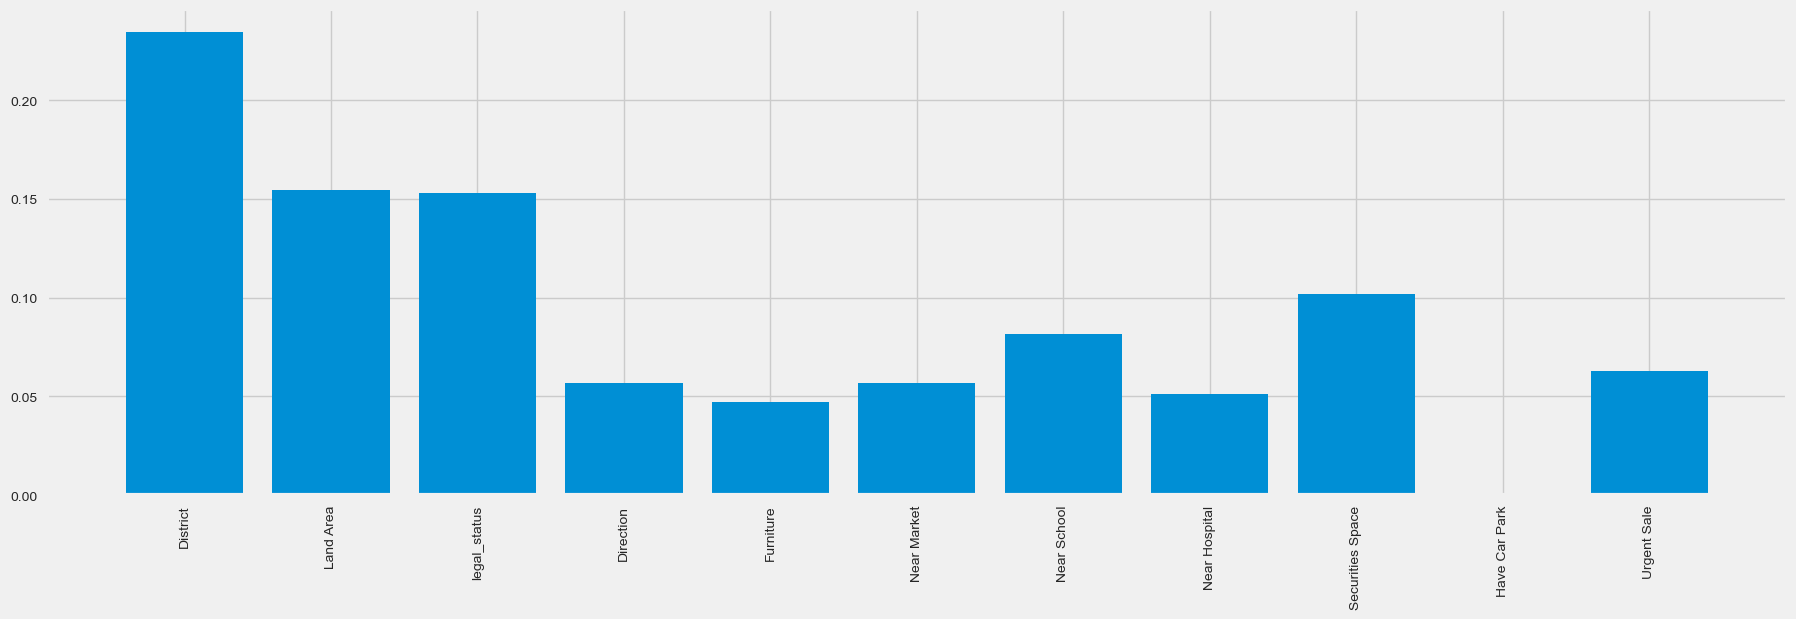

In [232]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

X = land_df.drop(['Price','Price/m2'],axis=1)
y = land_df['Price/m2']

model = XGBRegressor()
model.fit(X,y)

plt.figure(figsize=(20,6))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(ticks=range(len(list(X.columns))),labels = list(X.columns),rotation=90)

In [233]:
from sklearn.ensemble import IsolationForest

# Kiểm tra số lượng đặc trưng trong home_df
n_features = home_df.shape[1]

# Thiết lập max_features sao cho nhỏ hơn hoặc bằng số lượng đặc trưng
max_features = min(n_features, 27)  # 27 là giá trị bạn đã sử dụng trước đó

# Khởi tạo và huấn luyện Isolation Forest
clf = IsolationForest(random_state=3107, max_features=max_features)
clf.fit(home_df)

# Dự đoán và loại bỏ outliers
home_df['Anomalies'] = clf.predict(home_df)
home_df = home_df[home_df['Anomalies'] == 1]
home_df.drop(['Anomalies'], axis=1, inplace=True)
home_df.reset_index(drop=True, inplace=True)

In [234]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=1209,max_features=19)
clf.fit(home_df)

home_df['Anomalies'] = clf.predict(home_df)
home_df = home_df[home_df['Anomalies']==1]
home_df.drop('Anomalies',axis=1,inplace=True)
home_df.reset_index(drop=True,inplace=True)

In [235]:
home_df.to_csv('/Users/mac/crawdata/bds_train_data.csv',index=False)

## Training Machine Learning


In [236]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [237]:
df = pd.read_csv('/Users/mac/crawdata/bds_train_data.csv').drop_duplicates()
df.reset_index(drop=True,inplace=True)
df

,District,Price,Land Area,Bedroom,Floor,Bathroom,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2,Category
0,18,69.000000,5.351858,4.000000,5.000000,3.930908,2.0,4,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.00000,0.0,0.00000,0.328571,5
1,19,22.000000,4.290459,8.000000,4.000000,7.589673,2.0,4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.305556,2
2,8,25.000000,5.365976,1.000000,1.000000,1.000000,2.0,3,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.00000,0.0,0.00000,0.117371,5
3,10,15.500000,4.691348,4.000000,5.000000,4.000000,1.0,2,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.143519,4
4,3,6.200000,3.931826,4.000000,3.000000,5.000000,2.0,4,1.000000,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.124000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9232,14,18.678539,4.272730,3.000000,4.000000,3.448517,2.0,4,0.000000,0.0,0.0,0.0,0.196349,0.0,0.0,1.0,0.00000,0.0,0.00000,0.264770,5
9233,16,11.589942,4.010233,3.000000,4.449710,3.696524,2.0,4,0.000000,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.44971,0.0,0.44971,0.214040,5
9234,19,97.897562,5.461437,4.886538,7.897562,5.042531,2.0,4,0.551219,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.00000,0.0,0.00000,0.417593,5
9235,6,12.000000,4.692897,4.400855,4.000000,5.000000,2.0,3,0.599145,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.00000,0.0,0.00000,0.111170,5


In [238]:
n_samples = int(len(df) * 0.2)

test_df = df.sample(n=n_samples, random_state=44).reset_index(drop=True)

train_df = df.drop(test_df.index).reset_index(drop=True)

print(train_df.shape)
print(test_df.shape)

(7390, 21)
(1847, 21)


In [239]:
from sklearn.model_selection import KFold

#Create a new column called kfold and fill it with -1
train_df['kfold'] = -1
#Initiate the kfold class 
kf = KFold(n_splits=3,random_state=3107,shuffle=True)
#Fill the new kfold column
for fold, (train,val) in enumerate(kf.split(train_df)):
    train_df.loc[val,'kfold'] = fold

In [240]:
train_df['kfold'].value_counts()

kfold
0    2464
2    2463
1    2463
Name: count, dtype: int64

In [241]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [242]:
def model_running(model_choose,fold,data):
    #Split dataframe
    df_train = data[data['kfold'] != fold].reset_index(drop=True)
    df_test = data[data['kfold'] == fold].reset_index(drop=True)
    
    #Split X_train,X_test,y_train,y_test
    X_train = df_train.drop(['kfold','Price','Price/m2'],axis=1)
    X_test = df_test.drop(['kfold','Price','Price/m2'],axis=1)

    y_train = df_train['Price']
    y_test = df_test['Price']
    
    #Fitting model
    model = model_choose
    model.fit(X_train,y_train)

    #Predictions
    y_pred = model.predict(X_test)

    #Model evaluation
    r2 = r2_score(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    
    return r2,rmse 

### Linear Regression


In [243]:
lr = LinearRegression()
lr_r2 = []
lr_rmse = []
for fold in range(3):
    r2,rmse = model_running(lr,fold,train_df)
    lr_r2.append(r2)
    lr_rmse.append(rmse)

print(lr_r2)
print(f'Mean r square: {np.mean(lr_r2)}')
print(lr_rmse)
print(f'Mean root square error: {np.mean(lr_rmse)}')

[0.5955507576248924, 0.6298439733460852, 0.6288458103124371]
Mean r square: 0.618080180427805
[12.17510105144895, 12.187763633877665, 11.255410941585055]
Mean root square error: 11.87275854230389


### RandomForest

In [244]:
rf = RandomForestRegressor(random_state=3107)
rf_r2 = []
rf_rmse = []
for fold in range(3):
    r2,rmse = model_running(rf,fold,train_df)
    rf_r2.append(r2)
    rf_rmse.append(rmse)

print(rf_r2)
print(f'Mean r square: {np.mean(rf_r2)}')
print(rf_rmse)
print(f'Mean root square error: {np.mean(rf_rmse)}')

[0.7470618218229146, 0.7627519285111983, 0.7264404509743313]
Mean r square: 0.7454180671028148
[9.628258782219872, 9.757374097222424, 9.662958444222813]
Mean root square error: 9.682863774555036


### KNN 


In [245]:
knn = KNeighborsRegressor()
knn_r2 = []
knn_rmse = []
for fold in range(3):
    r2,rmse = model_running(knn,fold,train_df)
    knn_r2.append(r2)
    knn_rmse.append(rmse)

print(knn_r2)
print(f'Mean r square: {np.mean(knn_r2)}')
print(knn_rmse)
print(f'Mean root square error: {np.mean(knn_rmse)}')

[0.6411266162758568, 0.6597423191238162, 0.6300396285906562]
Mean r square: 0.6436361879967764
[11.468620608275463, 11.685184649431916, 11.23729483503999]
Mean root square error: 11.463700030915788


### XGBoost

In [246]:
xgb = XGBRegressor(random_state=3107)
xgb_r2 = []
xgb_rmse = []
for fold in range(3):
    r2,rmse = model_running(xgb,fold,train_df)
    xgb_r2.append(r2)
    xgb_rmse.append(rmse)

print(xgb_r2)
print(f'Mean r square: {np.mean(xgb_r2)}')
print(xgb_rmse)
print(f'Mean root square error: {np.mean(xgb_rmse)}')

[0.7417402678272361, 0.7449295484989882, 0.7289845357898529]
Mean r square: 0.7385514507053591
[9.729015818601148, 10.117231468045404, 9.61792106714665]
Mean root square error: 9.8213894512644


### LightBGM

In [247]:
lgbm = LGBMRegressor(random_state=3107)
lgbm_r2 = []
lgbm_rmse = []
for fold in range(3):
    r2,rmse = model_running(lgbm,fold,train_df)
    lgbm_r2.append(r2)
    lgbm_rmse.append(rmse)

print(lgbm_r2)
print(f'Mean r square: {np.mean(lgbm_r2)}')
print(lgbm_rmse)
print(f'Mean root square error: {np.mean(lgbm_rmse)}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 718
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.559540
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.122138
[LightGBM] [Warning] Found whi

LGBM is the best r2 score so we choose this model

In [248]:
from sklearn.model_selection import RandomizedSearchCV

X = train_df.drop(['kfold','Price','Price/m2'],axis=1)
y = train_df['Price']

In [249]:
#Max number of bins that feature values will be bucketed in
max_bin = [300,400,500]
#Shrinkage rate
learning_rate = [0.001,0.005,0.01,0.05]
#Number of iterations
num_iterations = [200,500,700,1000,1500,2000]
#Max number of leaves in one tree
num_leaves = [30,50,70,100]
#Boosting type
boosting_type = ['gbdt','dart']
# Create the random grid
random_grid = {'max_bin': max_bin,
               'learning_rate': learning_rate,
               'num_iterations': num_iterations,
               'num_leaves': num_leaves,
               'boosting_type': boosting_type
               }
print(random_grid)

{'max_bin': [300, 400, 500], 'learning_rate': [0.001, 0.005, 0.01, 0.05], 'num_iterations': [200, 500, 700, 1000, 1500, 2000], 'num_leaves': [30, 50, 70, 100], 'boosting_type': ['gbdt', 'dart']}


In [250]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
lgbm = LGBMRegressor(random_state=3107)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
lgbm_random = RandomizedSearchCV(estimator = lgbm, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=3107, n_jobs = -1)
# Fit the random search model
lgbm_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iteratio

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGB

/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Start training from score 18.369582
[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=500, num_iterations=1000, num_leaves=30; total time=  16.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=500, num_iterations=1000, num_leaves=30; total time=  16.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=500, num_leaves=70; total time=  19.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=500, num_leaves=70; total time=  22.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=500, num_iterations=1000, num_leaves=30; total time=  22.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=500, num_leaves=30; total time=  15.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=500, num_leaves=30; total time=  16.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=500, num_leaves=30; total time=  16.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=400, num_iterations=500, num_leaves=30; total time=  17.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=400, num_iterations=500, num_leaves=30; total time=  18.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=400, num_iterations=500, num_leaves=30; total time=  17.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=500, num_iterations=1500, num_leaves=50; total time= 1.1min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=500, num_iterations=500, num_leaves=100; total time=  33.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=500, num_iterations=1500, num_leaves=50; total time= 1.3min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=500, num_iterations=500, num_leaves=100; total time=  38.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=500, num_iterations=1500, num_leaves=50; total time= 1.2min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=300, num_iterations=200, num_leaves=70; total time=   8.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=500, num_leaves=70; total time=  25.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=500, num_iterations=500, num_leaves=100; total time=  33.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=500, num_iterations=2000, num_leaves=30; total time= 1.2min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=500, num_leaves=70; total time=  26.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.117505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582
[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=300, num_iterations=200, num_leaves=70; total time=   8.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.

/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=500, num_iterations=2000, num_leaves=30; total time= 1.1min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=300, num_iterations=200, num_leaves=70; total time=   8.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=500, num_iterations=2000, num_leaves=30; total time= 1.2min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=500, num_leaves=70; total time=  25.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=1000, num_leaves=30; total time=  12.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=1000, num_leaves=30; total time=  12.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=1000, num_leaves=30; total time=  12.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=1000, num_leaves=100; total time=  31.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=1000, num_leaves=100; total time=  29.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=1000, num_leaves=50; total time=  18.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=1000, num_leaves=50; total time=  22.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001836 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=1500, num_leaves=70; total time=  36.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=400, num_iterations=200, num_leaves=30; total time=   2.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=1000, num_leaves=100; total time=  46.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Start training from score 18.369582
[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=1000, num_leaves=50; total time=  17.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=400, num_iterations=200, num_leaves=30; total time=   4.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=1500, num_leaves=30; total time=  19.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=400, num_iterations=200, num_leaves=30; total time=   4.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=1500, num_leaves=70; total time=  44.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=1500, num_leaves=30; total time=  22.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=700, num_leaves=30; total time=  10.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=1500, num_leaves=70; total time=  44.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=1500, num_leaves=30; total time=  23.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=700, num_leaves=30; total time=  12.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=200, num_leaves=50; total time=   5.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=200, num_leaves=50; total time=   6.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=200, num_leaves=50; total time=   6.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=700, num_leaves=30; total time=  12.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=500, num_leaves=100; total time=  18.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=500, num_leaves=100; total time=  24.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=500, num_leaves=100; total time=  26.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=500, num_iterations=700, num_leaves=70; total time=  27.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=500, num_iterations=700, num_leaves=70; total time=  35.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=500, num_iterations=700, num_leaves=70; total time=  34.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=1500, num_leaves=100; total time= 1.3min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=500, num_iterations=700, num_leaves=100; total time=  39.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=500, num_iterations=700, num_leaves=100; total time=  40.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=1500, num_leaves=100; total time= 1.5min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=1500, num_leaves=100; total time= 1.5min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=500, num_iterations=700, num_leaves=100; total time=  49.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=500, num_leaves=50; total time=   9.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=2000, num_leaves=50; total time=  49.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=500, num_leaves=50; total time=  13.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=500, num_leaves=50; total time=  14.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=2000, num_leaves=50; total time=  55.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=500, num_leaves=70; total time=  20.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=500, num_leaves=70; total time=  21.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=2000, num_leaves=50; total time=  53.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=300, num_iterations=1500, num_leaves=50; total time=  54.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=500, num_leaves=70; total time=  25.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=300, num_iterations=1500, num_leaves=50; total time=  56.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=300, num_iterations=1500, num_leaves=50; total time=  56.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=500, num_iterations=200, num_leaves=50; total time=   4.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=500, num_iterations=1500, num_leaves=30; total time=  24.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=500, num_iterations=200, num_leaves=50; total time=   5.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976
[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=500, num_iterations=1500, num_leaves=30; total time=  24.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set

/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=500, num_iterations=1500, num_leaves=30; total time=  27.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=500, num_iterations=200, num_leaves=50; total time=   5.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=1500, num_leaves=30; total time=  24.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=1500, num_leaves=30; total time=  28.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=1500, num_leaves=30; total time=  24.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=500, num_leaves=70; total time=  18.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=500, num_leaves=70; total time=  20.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=500, num_leaves=70; total time=  20.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=300, num_iterations=700, num_leaves=100; total time=  26.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=400, num_iterations=700, num_leaves=50; total time=  23.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=300, num_iterations=700, num_leaves=100; total time=  30.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=400, num_iterations=700, num_leaves=50; total time=  26.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=300, num_iterations=700, num_leaves=100; total time=  32.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=500, num_leaves=30; total time=   8.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=500, num_iterations=500, num_leaves=70; total time=  16.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=500, num_iterations=500, num_leaves=70; total time=  16.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=500, num_iterations=500, num_leaves=70; total time=  22.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=500, num_leaves=30; total time=   9.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=500, num_leaves=30; total time=   8.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=400, num_iterations=700, num_leaves=50; total time=  28.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=1500, num_leaves=100; total time= 1.4min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=500, num_iterations=500, num_leaves=70; total time=  22.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=1500, num_leaves=100; total time= 1.5min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=500, num_iterations=500, num_leaves=70; total time=  27.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=1500, num_leaves=100; total time= 1.5min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=500, num_iterations=500, num_leaves=50; total time=  14.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=500, num_iterations=500, num_leaves=70; total time=  23.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=500, num_iterations=500, num_leaves=50; total time=  17.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=500, num_iterations=500, num_leaves=50; total time=  13.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=300, num_iterations=500, num_leaves=50; total time=  13.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=300, num_iterations=500, num_leaves=50; total time=  17.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=300, num_iterations=500, num_leaves=50; total time=  18.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=500, num_leaves=100; total time=  30.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=2000, num_leaves=50; total time= 1.5min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=500, num_leaves=100; total time=  34.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=2000, num_leaves=50; total time= 1.6min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=400, num_iterations=200, num_leaves=70; total time=  10.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=2000, num_leaves=50; total time= 1.6min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=400, num_iterations=200, num_leaves=70; total time=  10.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=400, num_iterations=200, num_leaves=70; total time=  10.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=500, num_leaves=30; total time=  10.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=500, num_leaves=100; total time=  35.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=500, num_leaves=30; total time=  13.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=500, num_leaves=30; total time=  10.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=200, num_leaves=100; total time=  12.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=200, num_leaves=100; total time=  13.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=200, num_leaves=100; total time=  13.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=500, num_iterations=2000, num_leaves=100; total time= 2.3min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=500, num_iterations=2000, num_leaves=100; total time= 2.3min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=400, num_iterations=2000, num_leaves=50; total time= 1.5min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=400, num_iterations=2000, num_leaves=50; total time= 1.7min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=500, num_iterations=1000, num_leaves=70; total time=  56.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=400, num_iterations=2000, num_leaves=50; total time= 1.7min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=500, num_iterations=2000, num_leaves=100; total time= 2.8min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=300, num_iterations=500, num_leaves=70; total time=  14.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=1000, num_leaves=70; total time=  32.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=500, num_iterations=1000, num_leaves=70; total time= 1.0min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=300, num_iterations=500, num_leaves=70; total time=  16.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=300, num_iterations=500, num_leaves=70; total time=  15.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=500, num_iterations=1000, num_leaves=70; total time=  48.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582
[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=1000, num_leaves=70; total time=  30.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can s

/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=1000, num_leaves=70; total time=  39.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=500, num_leaves=70; total time=  15.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=500, num_leaves=70; total time=  15.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=500, num_leaves=100; total time=  16.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=500, num_leaves=70; total time=  21.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=700, num_leaves=30; total time=   9.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=200, num_leaves=30; total time=   3.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=500, num_leaves=100; total time=  23.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=700, num_leaves=30; total time=  11.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=700, num_leaves=30; total time=  11.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=200, num_leaves=30; total time=   5.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=500, num_leaves=100; total time=  22.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880
[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=200, num_leaves=30; total time=   3.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can s

/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=500, num_iterations=500, num_leaves=70; total time=  21.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=500, num_iterations=500, num_leaves=70; total time=  23.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=500, num_iterations=500, num_leaves=70; total time=  27.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=500, num_iterations=1500, num_leaves=70; total time= 1.2min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=500, num_iterations=1500, num_leaves=70; total time= 1.2min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=1000, num_leaves=100; total time=  58.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=500, num_iterations=1500, num_leaves=70; total time= 1.4min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=1000, num_leaves=100; total time= 1.1min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=1000, num_leaves=100; total time= 1.1min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=500, num_iterations=1500, num_leaves=100; total time= 1.1min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=300, num_iterations=1000, num_leaves=70; total time=  47.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=500, num_iterations=2000, num_leaves=30; total time= 1.0min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=500, num_iterations=1500, num_leaves=100; total time= 1.1min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=500, num_iterations=1500, num_leaves=100; total time= 1.5min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=200, num_leaves=100; total time=  10.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=200, num_leaves=100; total time=  12.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=500, num_iterations=2000, num_leaves=30; total time= 1.1min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=200, num_leaves=100; total time=  12.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=500, num_iterations=2000, num_leaves=30; total time= 1.2min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=500, num_iterations=200, num_leaves=50; total time=   5.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=500, num_iterations=200, num_leaves=50; total time=   5.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=500, num_iterations=200, num_leaves=50; total time=   6.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=300, num_iterations=1000, num_leaves=70; total time=  51.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=300, num_iterations=1000, num_leaves=70; total time=  50.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=400, num_iterations=500, num_leaves=70; total time=  16.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=400, num_iterations=500, num_leaves=70; total time=  17.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=2000, num_leaves=50; total time=  44.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=300, num_iterations=1500, num_leaves=70; total time=  34.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=400, num_iterations=500, num_leaves=70; total time=  18.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=300, num_iterations=1500, num_leaves=70; total time=  36.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=300, num_iterations=1500, num_leaves=70; total time=  37.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=2000, num_leaves=50; total time=  54.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=2000, num_leaves=50; total time=  52.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=1500, num_leaves=30; total time=  23.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=700, num_leaves=30; total time=  16.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=700, num_leaves=30; total time=  18.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=1500, num_leaves=30; total time=  26.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582
[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=700, num_leaves=30; total time=  18.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can s

/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=200, num_leaves=30; total time=   2.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=1500, num_leaves=30; total time=  28.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=200, num_leaves=30; total time=   3.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=200, num_leaves=30; total time=   3.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=500, num_leaves=50; total time=  16.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=500, num_leaves=50; total time=  17.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=1000, num_leaves=70; total time=  44.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=2000, num_leaves=30; total time=  36.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=1000, num_leaves=70; total time=  47.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=2000, num_leaves=30; total time=  40.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976
[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=2000, num_leaves=30; total time=  40.1s


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582
[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=1000, num_leaves=70; total time=  47.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start traini

/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=300, num_iterations=500, num_leaves=50; total time=  18.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=2000, num_leaves=30; total time=  28.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=400, num_iterations=1000, num_leaves=70; total time=  22.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=2000, num_leaves=30; total time=  29.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=200, num_leaves=100; total time=   7.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=2000, num_leaves=30; total time=  34.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=200, num_leaves=100; total time=   7.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=400, num_iterations=1000, num_leaves=70; total time=  30.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=400, num_iterations=1000, num_leaves=70; total time=  31.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=200, num_leaves=100; total time=   8.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=500, num_leaves=50; total time=  13.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=500, num_leaves=50; total time=  14.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=2000, num_leaves=70; total time=  48.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=500, num_leaves=50; total time=  14.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=700, num_leaves=100; total time=  18.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=2000, num_leaves=70; total time=  51.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=2000, num_leaves=70; total time= 1.1min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=300, num_iterations=2000, num_leaves=70; total time=  46.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880
[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=200, num_leaves=50; total time=   5.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can se

/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=200, num_leaves=50; total time=   5.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=300, num_iterations=200, num_leaves=50; total time=   5.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=300, num_iterations=2000, num_leaves=70; total time=  45.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=700, num_leaves=100; total time=  29.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=300, num_iterations=2000, num_leaves=70; total time=  50.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.123507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Start training from score 18.035880
[CV] END boosting_type=dart, learning_rate=0.01, max_bin=500, num_iterations=500, num_leaves=30; total time=  11.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=500, num_iterations=500, num_leaves=30; total time=  12.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=700, num_leaves=100; total time=  30.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.01, max_bin=500, num_iterations=500, num_leaves=30; total time=  11.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=400, num_iterations=1000, num_leaves=30; total time=  16.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=400, num_iterations=1000, num_leaves=30; total time=  16.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=400, num_iterations=1000, num_leaves=30; total time=  15.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=1500, num_leaves=100; total time=  53.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=1000, num_leaves=70; total time=  39.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=1500, num_leaves=100; total time=  59.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=1000, num_leaves=70; total time=  48.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=400, num_iterations=700, num_leaves=100; total time=  37.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=1000, num_leaves=70; total time=  49.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=400, num_iterations=700, num_leaves=100; total time=  42.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=500, num_iterations=1500, num_leaves=100; total time= 1.3min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=700, num_leaves=100; total time=  34.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=400, num_iterations=700, num_leaves=100; total time=  41.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=700, num_leaves=100; total time=  39.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=700, num_leaves=100; total time=  36.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=500, num_iterations=1500, num_leaves=70; total time=  40.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=1500, num_leaves=50; total time=  31.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=500, num_iterations=1500, num_leaves=70; total time=  39.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=400, num_iterations=200, num_leaves=50; total time=   5.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=400, num_iterations=200, num_leaves=50; total time=   5.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.005, max_bin=400, num_iterations=200, num_leaves=50; total time=   6.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=1500, num_leaves=50; total time=  31.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=500, num_iterations=1500, num_leaves=70; total time=  56.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=1500, num_leaves=50; total time=  45.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=700, num_leaves=100; total time=  27.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=700, num_leaves=100; total time=  30.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=1500, num_leaves=50; total time=  55.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=300, num_iterations=700, num_leaves=100; total time=  30.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=1500, num_leaves=50; total time= 1.0min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=300, num_iterations=1500, num_leaves=50; total time= 1.0min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=300, num_iterations=500, num_leaves=70; total time=  23.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=700, num_leaves=30; total time=  12.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=300, num_iterations=500, num_leaves=70; total time=  24.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=300, num_iterations=500, num_leaves=70; total time=  25.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=700, num_leaves=30; total time=  14.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=500, num_iterations=700, num_leaves=30; total time=  13.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=400, num_iterations=1000, num_leaves=30; total time=  16.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=400, num_iterations=1000, num_leaves=30; total time=  17.8s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 935
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=400, num_iterations=1000, num_leaves=30; total time=  18.4s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1139
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=1500, num_leaves=100; total time= 1.6min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 929
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=500, num_iterations=700, num_leaves=50; total time=  29.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=500, num_iterations=700, num_leaves=50; total time=  33.3s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=1000, num_leaves=30; total time=  19.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=1500, num_leaves=100; total time= 1.8min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=1000, num_leaves=30; total time=  21.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=500, num_iterations=700, num_leaves=50; total time=  29.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=1500, num_leaves=100; total time= 1.9min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.01, max_bin=400, num_iterations=1000, num_leaves=30; total time=  21.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=400, num_iterations=500, num_leaves=50; total time=  14.7s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=400, num_iterations=500, num_leaves=50; total time=  16.6s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 983
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=gbdt, learning_rate=0.05, max_bin=400, num_iterations=500, num_leaves=50; total time=  16.2s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=400, num_iterations=2000, num_leaves=70; total time= 1.8min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=400, num_iterations=2000, num_leaves=70; total time= 2.0min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=200, num_leaves=30; total time=   5.0s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=2000, num_leaves=30; total time= 1.1min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=400, num_iterations=2000, num_leaves=70; total time= 2.0min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=200, num_leaves=30; total time=   4.5s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=200, num_leaves=30; total time=   4.1s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=2000, num_leaves=30; total time= 1.2min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 821
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.035880


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=300, num_iterations=200, num_leaves=100; total time=   8.9s
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 825
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.664976


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.005, max_bin=400, num_iterations=2000, num_leaves=30; total time= 1.2min
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 794
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.369582


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[CV] END boosting_type=dart, learning_rate=0.05, max_bin=300, num_iterations=200, num_leaves=100; total time=   9.0s
[CV] END boosting_type=dart, learning_rate=0.05, max_bin=300, num_iterations=200, num_leaves=100; total time=   8.8s
[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=1500, num_leaves=50; total time=  43.2s
[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=1500, num_leaves=50; total time=  42.8s
[CV] END boosting_type=gbdt, learning_rate=0.001, max_bin=400, num_iterations=1500, num_leaves=50; total time=  45.2s
[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=2000, num_leaves=70; total time=  37.0s
[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=2000, num_leaves=70; total time=  40.3s
[CV] END boosting_type=dart, learning_rate=0.001, max_bin=300, num_iterations=2000, num_leaves=70; total time=  40.5s
[LightGBM] [Warning] Found whitespace in feature_names, re

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=3107), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'dart'],
                                        'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05],
                                        'max_bin': [300, 400, 500],
                                        'num_iterations': [200, 500, 700, 1000,
                                                           1500, 2000],
                                        'num_leaves': [30, 50, 70, 100]},
                   random_state=3107, verbose=2)

In [251]:
lgbm_random.best_params_

{'num_leaves': 30,
 'num_iterations': 200,
 'max_bin': 300,
 'learning_rate': 0.05,
 'boosting_type': 'gbdt'}

In [252]:
#Fit tuned model
lgbm = LGBMRegressor(random_state=3107,num_leaves=30,num_iterations=700,max_bin=40,learning_rate=0.01,boosting_type='gbdt')
lgbm_r2 = []
lgbm_rmse = []
for fold in range(3):
    r2,rmse = model_running(lgbm,fold,train_df)
    lgbm_r2.append(r2)
    lgbm_rmse.append(rmse)

print(lgbm_r2)
print(f'Mean r square: {np.mean(lgbm_r2)}')
print(lgbm_rmse)
print(f'Mean root square error: {np.mean(lgbm_rmse)}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 4926, number of used features: 18
[LightGBM] [Info] Start training from score 18.559540
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 4927, number of used features: 18
[LightGBM] [Info] Start training from score 18.122138
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [In

In [253]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(train_df)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(test_df)
x_test = pd.DataFrame(x_test_scaled)

In [254]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [258]:
final_model = LGBMRegressor(random_state=3107,num_leaves=30,num_iterations=200,max_bin=300,learning_rate=0.05,boosting_type='gbdt')
final_model.fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 7390, number of used features: 19
[LightGBM] [Info] Start training from score 18.356834


LGBMRegressor(learning_rate=0.05, max_bin=300, num_iterations=200,
              num_leaves=30, random_state=3107)

In [263]:
#Final evaluation
final_X_test = test_df.drop(['Price','Price/m2'],axis=1)
final_y_test = test_df.Price
pred = final_model.predict(final_X_test)
print('r2:',r2_score(final_y_test,pred))
print('rmse:',mean_squared_error(final_y_test,pred,squared=False))

r2: 0.8346350895458915
rmse: 8.049056399662124


In [261]:
df.head()

,District,Price,Land Area,Bedroom,Floor,Bathroom,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2,Category
0,18,69.0,5.351858,4.0,5.0,3.930908,2.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.328571,5
1,19,22.0,4.290459,8.0,4.0,7.589673,2.0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305556,2
2,8,25.0,5.365976,1.0,1.0,1.000000,2.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.117371,5
3,10,15.5,4.691348,4.0,5.0,4.000000,1.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143519,4
4,3,6.2,3.931826,4.0,3.0,5.000000,2.0,4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124000,2


## Test 

In [262]:
from unidecode import unidecode

district_mapping = {
    "khac": 0,
    "binh chanh": 1,
    "binh tan": 6,
    "binh thanh": 3,
    "go vap": 4,
    "nha be": 3,
    "phu nhuan": 13,
    "quan 1": 19,
    "quan 10": 16,
    "quan 11": 15,
    "quan 12": 1,
    "quan 3": 18,
    "quan 4": 7,
    "quan 5": 17,
    "quan 6": 5,
    "quan 7": 11,
    "quan 8": 2,
    "tan binh": 14,
    "tan phu": 8,
    "thu duc": 10
}

Direction_mapping= { 
    "khong": 3,
    "bac": 2,
    "nam": 4,
    "tay": 1,
    "dong": 0
} 

category_mapping = { 
    
} 
# Nhập dữ liệu từ người dùng
def get_input_features():
    features = {}

    district_input = unidecode(input("Nhập tên quận (District): ").strip().lower())
    features['District'] = district_mapping.get(district_input, None)

    if features['District'] is None:
        print("Tên quận không hợp lệ. Vui lòng thử lại.")
        return get_input_features()

    try:
        features['Land Area'] = float(input("Nhập diện tích đất : "))
        features['Bedroom'] = float(input("Nhập số phòng ngủ : "))
        features['Floor'] = float(input("Nhập số tầng: "))
        features['Bathroom'] = float(input("Nhập số phòng tắm : "))
        features['Legal Status'] = float(input("Nhập tình trạng pháp lý (0: Đang chờ sổ, 1: Hợp đồng mua bán, 2 Sổ hồng/sổ đỏ) : "))
        
        direction_input =  unidecode(input("Nhập hướng nhà (: ").strip().lower())
        features['Direction'] = Direction_mapping.get(direction_input, None)
        
        if features['Direction'] is None:
            print("Hướng nhà không hợp lệ. Vui lòng thử lại.")
            return get_input_features()

        features['Furniture'] = float(input("Nhập số đồ nội thất (1: có, 0: không): "))
        features['Have Mezzanine'] = float(input("Có gác lửng không (1: có, 0: không): "))
        features['Have Rooftop'] = float(input("Có sân thượng không (1: có, 0: không): "))
        features['Have Basement'] = float(input("Có tầng hầm không (1: có, 0: không): "))
        features['Have Market'] = float(input("Gần chợ không (1: có, 0: không): "))
        features['Near School'] = float(input("Gần trường không (1: có, 0: không): "))
        features['Near Hospital'] = float(input("Gần bệnh viện không (1: có, 0: không): "))
        features['Frontage'] = float(input("Mặt tiền (1: có, 0: không): "))
        features['Securities Space'] = float(input("Nhập không gian bảo mật (1: có, 0: không): "))
        features['Have Car Park'] = float(input("Có chỗ đậu xe không (1: có, 0: không): "))
        features['Urgent Sale'] = float(input("Bán gấp không (1: có, 0: không): "))
        features['Category'] = float(input("Loại nhà (căn hộ chung cư: 1, nhà: 2, shop house: 3, biệt thự: 4, nhà mặt tiền: 5): "))

    except ValueError:
        print("Dữ liệu nhập vào không hợp lệ. Vui lòng thử lại.")
        return get_input_features()

    return pd.DataFrame([features])

def predict_house_price(model):
    input_data = get_input_features()
    if input_data is None:
        return  # Dừng lại nếu không có dữ liệu hợp lệ
    prediction = model.predict(input_data)
    print("Giá nhà dự đoán là:", prediction[0])

# Gọi hàm dự đoán
predict_house_price(final_model)

Giá nhà dự đoán là: 59.60294205774617
